In [205]:
import numpy as np 
import pandas as pd # for working with dataframes
import seaborn as sns # for data visualization 

from matplotlib import pyplot as plt # for plotting
%matplotlib inline
sns.set_style("whitegrid")

import warnings # http://blog.johnmuellerbooks.com/2015/11/30/warnings-in-python-and-anaconda/
warnings.filterwarnings("ignore")

# Data Pre-Processing

In [206]:
df= pd.read_csv("data.csv")
df.head()


id                       name   artists  duration_ms  \
0  0gNNToCW3qjabgTyBSjt3H  !Que Vida! - Mono Version  ['Love']       220560   
1  0tMgFpOrXZR6irEOLNWwJL                       "40"    ['U2']       157840   
2  2ZywW3VyVx6rrlrX75n3JB                "40" - Live    ['U2']       226200   
3  6DdWA7D1o5TU2kXWyCLcch     "40" - Remastered 2008    ['U2']       157667   
4  3vMmwsAiLDCfyc1jl76lQE     "40" - Remastered 2008    ['U2']       157667   

  release_date  year  acousticness  danceability  energy  instrumentalness  \
0      11/1/66  1966        0.5250         0.600   0.540           0.00305   
1      2/28/83  1983        0.2280         0.368   0.480           0.70700   
2      8/20/83  1983        0.0998         0.272   0.684           0.01450   
3      2/28/83  1983        0.1850         0.371   0.545           0.58200   
4      2/28/83  1983        0.1850         0.371   0.545           0.58200   

   liveness  loudness  speechiness    tempo  valence  mode  key  popularity  \
0     0.100   -11.803       0.0328  125.898    0.547     1    9          26   
1     0.159   -11.605       0.0306  150.166    0.338     1    8          21   
2     0.946    -9.728       0.0505  143.079    0.279     1    8          41   
3     0.183    -9.315       0.0307  150.316    0.310     1    8          37   
4     0.183    -9.315       0.0307  150.316    0.310     1    8          35   

   explicit  
0         0  
1         0  
2         0  
3         0  
4         0

In [207]:
df.shape

(169907, 19)

In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169907 entries, 0 to 169906
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                169907 non-null  object 
 1   name              169907 non-null  object 
 2   artists           169907 non-null  object 
 3   duration_ms       169907 non-null  int64  
 4   release_date      169907 non-null  object 
 5   year              169907 non-null  int64  
 6   acousticness      169907 non-null  float64
 7   danceability      169907 non-null  float64
 8   energy            169907 non-null  float64
 9   instrumentalness  169907 non-null  float64
 10  liveness          169907 non-null  float64
 11  loudness          169907 non-null  float64
 12  speechiness       169907 non-null  float64
 13  tempo             169907 non-null  float64
 14  valence           169907 non-null  float64
 15  mode              169907 non-null  int64  
 16  key               16

With 169,907 tracks and all variables successfully filled, the progress is now satisfactory. However, let's further investigate to identify potential discrepancies within the data. We will use the pd.Series.unique() method to examine the variables with a restricted set of potential values (as specified in the comments for each print statement).

In [209]:
print(df["key"].unique()) # from 0-11

[ 9  8  2  0 10  7  1 11  5  4  3  6]


In [210]:
print(df["mode"].unique()) # from 0-1

[1 0]


In [211]:
print(df["explicit"].unique()) # from 0-1

[0 1]


The variables mode, key, and explicit seem to be in a satisfactory state. Now, let's examine the variables that are assumed to be restricted inside a certain range:

In [212]:
print(str(df["year"].min()) + " – " + str(df["year"].max())) # Range: [1921 – 2020]
print(str(df["acousticness"].min()) + " – " + str(df["acousticness"].max())) # Range: [0.0 – 1.0]
print(str(df["danceability"].min()) + " – " + str(df["danceability"].max())) # Range: [0.0 – 1.0]
print(str(df["energy"].min()) + " – " + str(df["energy"].max())) # Range: [0.0 – 1.0]
print(str(df["instrumentalness"].min()) + " – " + str(df["instrumentalness"].max())) # Range: [0.0 – 1.0]
print(str(df["speechiness"].min()) + " – " + str(df["speechiness"].max())) # Range: [0.0 – 1.0]
print(str(df["valence"].min()) + " – " + str(df["valence"].max())) # Range: [0.0 – 1.0]
print(str(df["popularity"].min()) + " – " + str(df["popularity"].max())) # Range: [0 – 100]

1921 – 2020
0.0 – 0.996
0.0 – 0.988
0.0 – 1.0
0.0 – 1.0
0.0 – 0.969
0.0 – 1.0
0 – 100


All the ranges are within the predicted parameters. Nevertheless, let's verify whether there are any duplicate entries that might potentially bias our data:

In [213]:
df[df.duplicated()]

Empty DataFrame
Columns: [id, name, artists, duration_ms, release_date, year, acousticness, danceability, energy, instrumentalness, liveness, loudness, speechiness, tempo, valence, mode, key, popularity, explicit]
Index: []

In [214]:
missing_values = df.isnull().sum()

In [215]:
missing_values

id                  0
name                0
artists             0
duration_ms         0
release_date        0
year                0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
mode                0
key                 0
popularity          0
explicit            0
dtype: int64

In [216]:
duplicate_rows=df.duplicated().sum()

In [217]:
duplicate_rows

0

In [218]:
missing_values = df.isnull().sum()

# Checking for duplicates
duplicates = df.duplicated().sum()

# Summary of missing values and duplicates
missing_values_summary = pd.DataFrame({'Missing Values': missing_values, 'Duplicates': duplicates})
missing_values_summary

Missing Values  Duplicates
id                             0           0
name                           0           0
artists                        0           0
duration_ms                    0           0
release_date                   0           0
year                           0           0
acousticness                   0           0
danceability                   0           0
energy                         0           0
instrumentalness               0           0
liveness                       0           0
loudness                       0           0
speechiness                    0           0
tempo                          0           0
valence                        0           0
mode                           0           0
key                            0           0
popularity                     0           0
explicit                       0           0

The analysis shows that:

Missing Values: There are no missing (NaN) values in any of the columns of your dataset.
Duplicates: There are no duplicate rows in your dataset.
This means our dataset is clean in terms of missing values and duplicate entries.we can proceed with further analysis or data processing as needed.








# Descriptive Analysis

In [219]:
descriptive_stats = df.describe()
descriptive_stats


duration_ms           year   acousticness   danceability  \
count  1.699070e+05  169907.000000  169907.000000  169907.000000   
mean   2.314071e+05    1977.223234       0.493217       0.538147   
std    1.213223e+05      25.593318       0.376628       0.175345   
min    5.108000e+03    1921.000000       0.000000       0.000000   
25%    1.710400e+05    1957.000000       0.094500       0.417000   
50%    2.086000e+05    1978.000000       0.492000       0.548000   
75%    2.629665e+05    1999.000000       0.888000       0.667000   
max    5.403500e+06    2020.000000       0.996000       0.988000   

              energy  instrumentalness       liveness       loudness  \
count  169907.000000     169907.000000  169907.000000  169907.000000   
mean        0.488591          0.161939       0.206692     -11.370311   
std         0.267391          0.309330       0.176797       5.666795   
min         0.000000          0.000000       0.000000     -60.000000   
25%         0.263000          0.000000       0.098400     -14.470000   
50%         0.481000          0.000204       0.135000     -10.474000   
75%         0.710000          0.086800       0.263000      -7.118000   
max         1.000000          1.000000       1.000000       3.855000   

         speechiness          tempo        valence           mode  \
count  169907.000000  169907.000000  169907.000000  169907.000000   
mean        0.094058     116.947850       0.532091       0.708552   
std         0.149938      30.727079       0.262407       0.454431   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.034900      93.516000       0.322000       0.000000   
50%         0.045000     114.777000       0.544000       1.000000   
75%         0.075400     135.712000       0.749000       1.000000   
max         0.969000     244.091000       1.000000       1.000000   

                 key     popularity       explicit  
count  169907.000000  169907.000000  169907.000000  
mean        5.200498      31.556681       0.084864  
std         3.515272      21.582730       0.278680  
min         0.000000       0.000000       0.000000  
25%         2.000000      12.000000       0.000000  
50%         5.000000      33.000000       0.000000  
75%         8.000000      48.000000       0.000000  
max        11.000000     100.000000       1.000000

In [220]:
focused_columns = ['tempo', 'valence', 'mode', 'key', 'popularity', 'explicit']
focused_descriptive_stats = df[focused_columns].describe()
focused_descriptive_stats

tempo        valence           mode            key  \
count  169907.000000  169907.000000  169907.000000  169907.000000   
mean      116.947850       0.532091       0.708552       5.200498   
std        30.727079       0.262407       0.454431       3.515272   
min         0.000000       0.000000       0.000000       0.000000   
25%        93.516000       0.322000       0.000000       2.000000   
50%       114.777000       0.544000       1.000000       5.000000   
75%       135.712000       0.749000       1.000000       8.000000   
max       244.091000       1.000000       1.000000      11.000000   

          popularity       explicit  
count  169907.000000  169907.000000  
mean       31.556681       0.084864  
std        21.582730       0.278680  
min         0.000000       0.000000  
25%        12.000000       0.000000  
50%        33.000000       0.000000  
75%        48.000000       0.000000  
max       100.000000       1.000000

Duration (ms):

Count: 169,907 songs, indicating a large dataset.
Mean: The average song length is about 231,407 ms (approx. 3.86 minutes).
Standard Deviation: A high standard deviation (121,322 ms) suggests a wide range of song lengths.
Min/Max: The shortest song is 5,108 ms, and the longest is 5,403,500 ms, highlighting extreme variations.

Year:

Mean: Average year of release is around 1977.
Standard Deviation: With a standard deviation of about 25.59 years, the dataset spans across different musical eras.
Min/Max: Ranges from 1921 to 2020, covering a century of music.

Acousticness:

Mean: Average acousticness is 0.493, indicating a balance between acoustic and non-acoustic music.
Min/Max: Ranges from 0 (not acoustic) to 0.996 (highly acoustic).

Danceability:

Mean: The average danceability score is 0.538, suggesting a moderate level of danceability in songs.
Min/Max: Ranges from non-danceable (0) to highly danceable (0.988).

Energy:

Mean: The average energy is 0.489, showing a moderate level of energy in the dataset.
Min/Max: Ranges from very low energy (0) to high energy (1).

Popularity:

Mean: The average popularity score is 31.56, on a scale of 0 to 100.
Standard Deviation: A standard deviation of 21.58 indicates significant variability in song popularity.

Loudness:

Mean: The average loudness is -11.37 dB.
Min/Max: Ranges from very quiet (-60 dB) to relatively loud (3.855 dB).

Speechiness, Tempo, Valence, Mode, Key:

These features describe various aspects of the songs, such as the presence of spoken words (speechiness), the speed (tempo), the musical positiveness (valence), the modality (mode), and the primary musical key (key).
Their means, standard deviations, and ranges provide insights into the typical values and variations in these musical attributes.

Explicit:

Mean: 0.084, indicating a small proportion of songs are labeled as explicit.
Min/Max: A binary feature, with 0 representing non-explicit and 1 representing explicit content.


These statistics are instrumental in understanding the overall characteristics of the music dataset, revealing trends, averages, and ranges across different musical attributes. ​

In [221]:
#bucketing
import plotly.express as px
year_list = sorted(list(df['year'].unique()))
res = pd.cut(df['year'],10,labels=['1921-31','1931-41','1941-51','1951-61','1961-71','1971-81','1981-91','1991-01','2001-11','2011-2020'])
df['decade'] = res 
df.head(2)
print(df['decade'].value_counts())
count = dict(df['decade'].value_counts())
fig = px.pie(values=list(count.values()), names=list(count.keys())) 
fig.show()

1961-71      20000
1981-91      20000
1991-01      20000
2001-11      20000
1971-81      19998
1951-61      19950
2011-2020    19656
1941-51      14968
1931-41       9075
1921-31       6260
Name: decade, dtype: int64


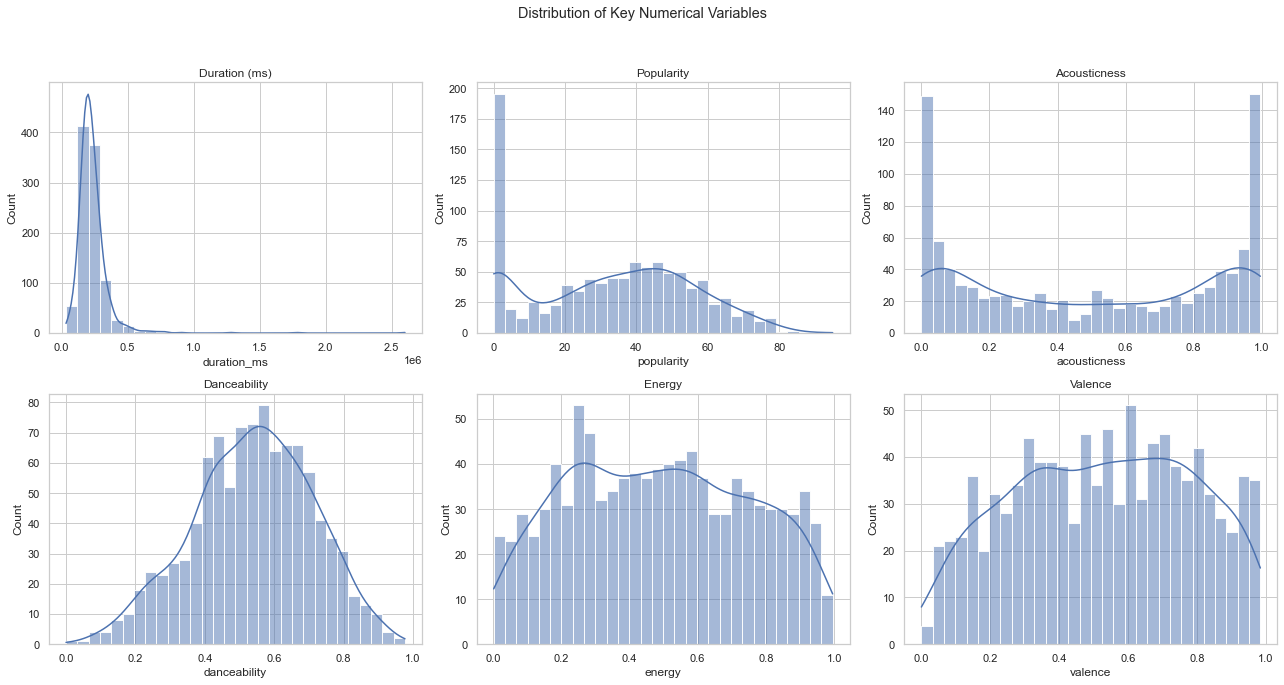

In [222]:
sns.set(style="whitegrid")

# Creating a subset of data for visualization to avoid overplotting
subset_data = df.sample(min(1000, len(df)), random_state=1)

# Distribution of some key numerical variables
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Distribution of Key Numerical Variables')

# Plotting each variable
sns.histplot(subset_data['duration_ms'], bins=30, ax=axes[0, 0], kde=True)
axes[0, 0].set_title('Duration (ms)')

sns.histplot(subset_data['popularity'], bins=30, ax=axes[0, 1], kde=True)
axes[0, 1].set_title('Popularity')

sns.histplot(subset_data['acousticness'], bins=30, ax=axes[0, 2], kde=True)
axes[0, 2].set_title('Acousticness')

sns.histplot(subset_data['danceability'], bins=30, ax=axes[1, 0], kde=True)
axes[1, 0].set_title('Danceability')

sns.histplot(subset_data['energy'], bins=30, ax=axes[1, 1], kde=True)
axes[1, 1].set_title('Energy')

sns.histplot(subset_data['valence'], bins=30, ax=axes[1, 2], kde=True)
axes[1, 2].set_title('Valence')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


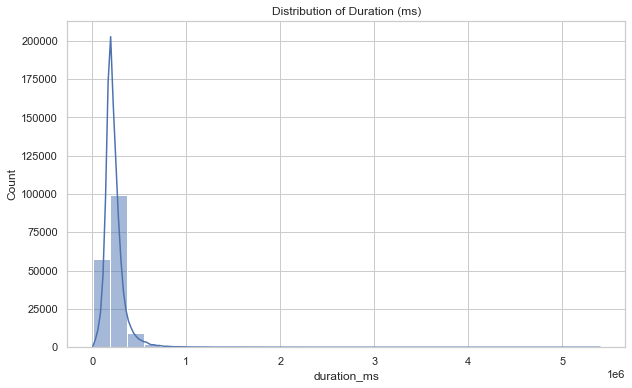

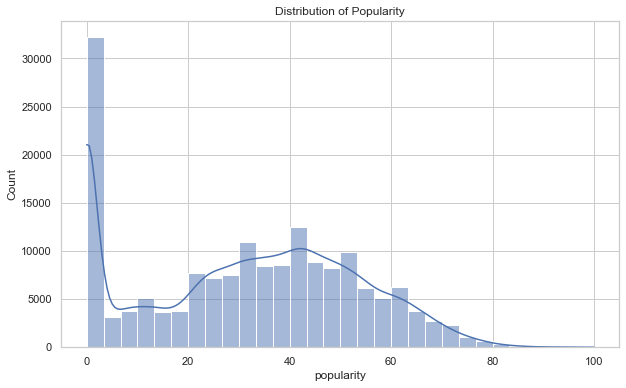

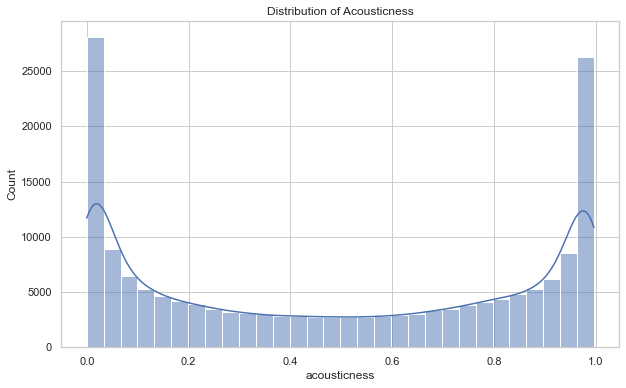

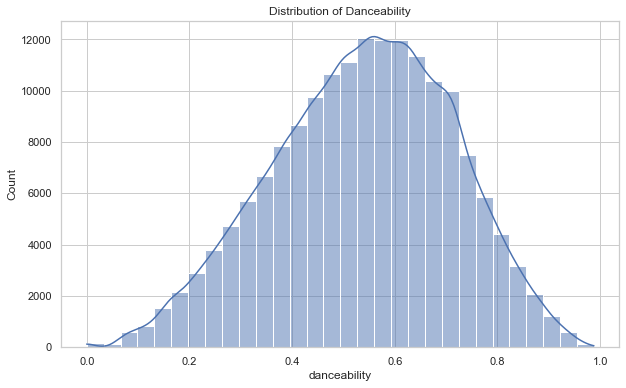

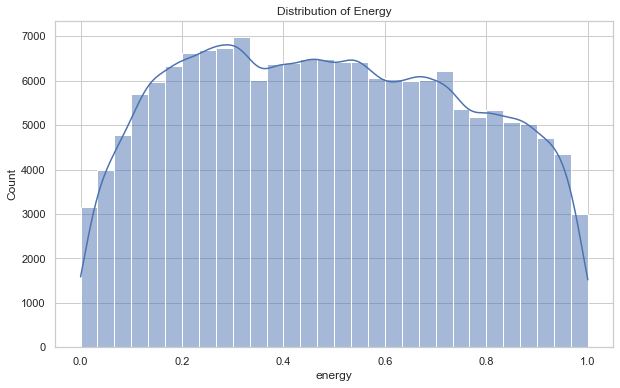

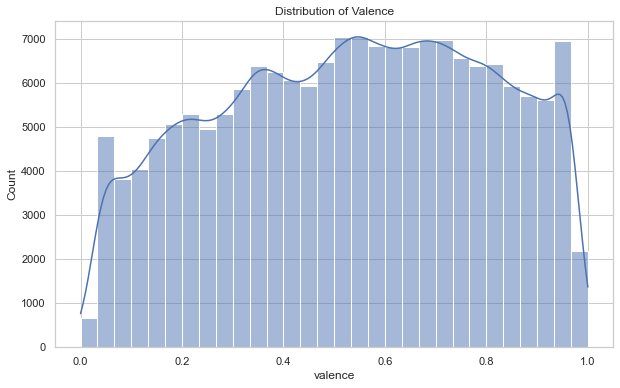

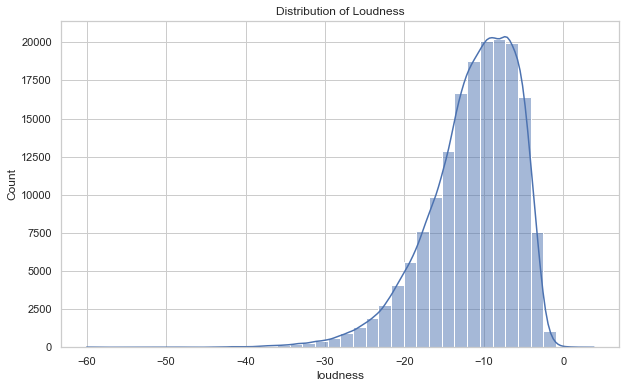

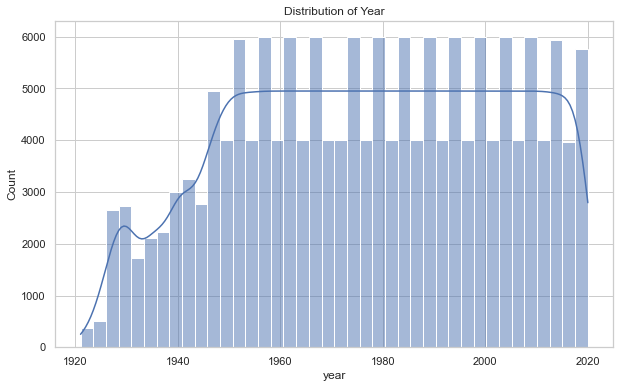

In [223]:
def plot_distribution(df, column, title, bins=30):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], bins=bins, kde=True)
    plt.title(title)
    plt.show()

# Plotting distributions
plot_distribution(df, 'duration_ms', 'Distribution of Duration (ms)')
plot_distribution(df, 'popularity', 'Distribution of Popularity')
plot_distribution(df, 'acousticness', 'Distribution of Acousticness')
plot_distribution(df, 'danceability', 'Distribution of Danceability')
plot_distribution(df, 'energy', 'Distribution of Energy')
plot_distribution(df, 'valence', 'Distribution of Valence')
plot_distribution(df, 'loudness', 'Distribution of Loudness', bins=40)
plot_distribution(df, 'year', 'Distribution of Year', bins=40)


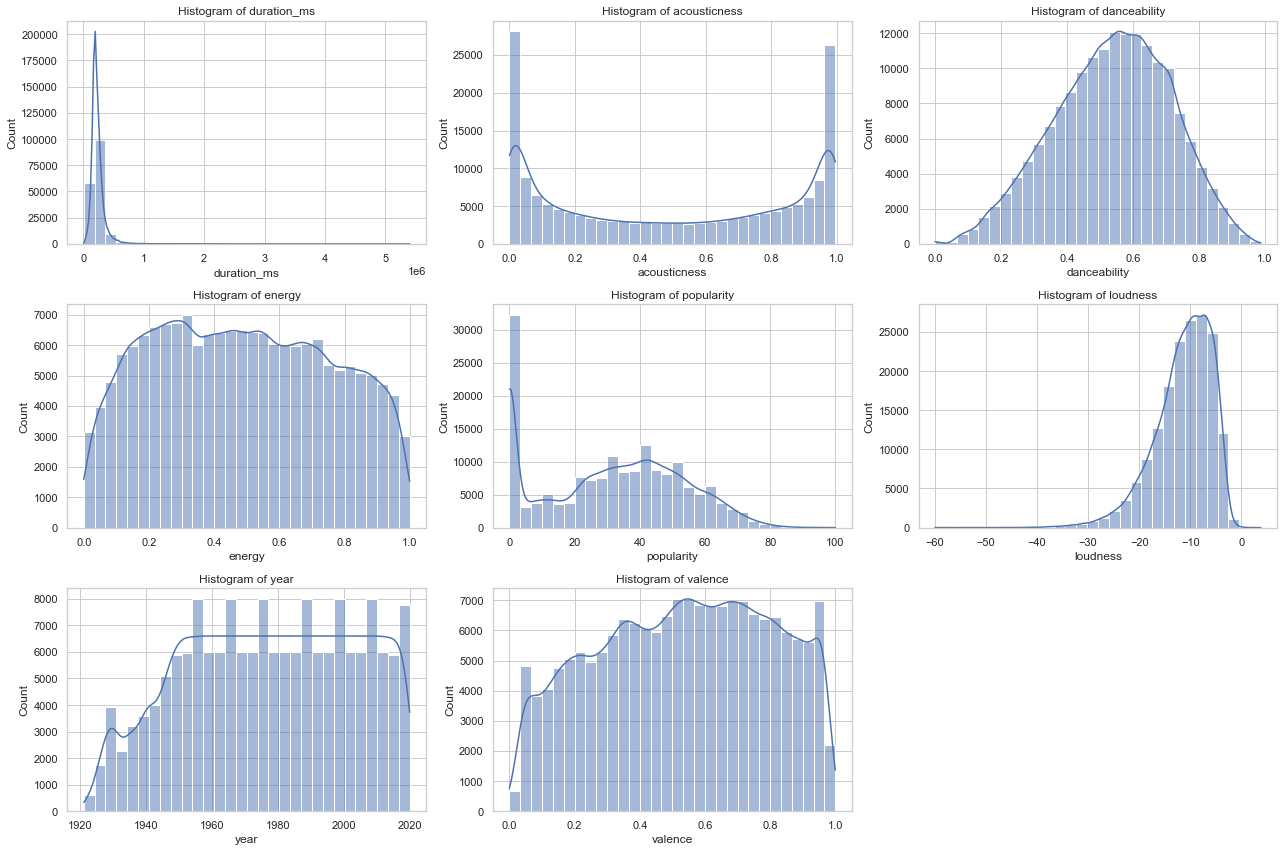

In [224]:

extended_features = ['duration_ms', 'acousticness', 'danceability', 'energy', 'popularity', 'loudness','year','valence']

plt.figure(figsize=(18, 12))

for i, feature in enumerate(extended_features):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[feature], kde=True, bins=30 if feature != 'explicit' else 2)
    plt.title(f'Histogram of {feature}')
    plt.tight_layout()

plt.show()

Duration (ms):

Distribution: The histogram for duration_ms shows that most songs have a duration clustered around 200,000 to 300,000 milliseconds (3 to 5 minutes).

Skewness: The distribution appears to be right-skewed, indicating that there are some songs with significantly longer durations, but these are relatively rare.

Implication: The typical length of a song in your dataset falls within the standard duration for commercial music tracks.


Acousticness:

Distribution: This feature shows a bimodal distribution, with one peak near 0 (less acoustic) and another peak closer to 1 (more acoustic).

Variation: There is a wide variation in acousticness among the songs, indicating a mix of songs from highly acoustic to very little acoustic content.

Implication: The dataset includes a diverse range of songs in terms of acoustic characteristics.



Danceability:

Distribution: The histogram for danceability is somewhat normally distributed, with most songs having moderate danceability scores.

Concentration: The majority of songs are concentrated around the 0.4 to 0.7 range, indicating a tendency towards danceable music.

Implication: The dataset tends to contain songs that are reasonably suitable for dancing.



Energy:

Distribution: Energy levels are fairly evenly distributed across the spectrum.

Peak: There is a slight concentration of songs with high energy levels, but no distinct peak.

Implication: Songs in your dataset exhibit a wide range of energy levels, from low to high, without a strong bias towards either.



Popularity:

Distribution: The popularity scores are somewhat evenly distributed, with a slight skew towards lower values.

Range: The histogram shows that there are songs across all levels of popularity, from very low to very high.

Implication: The dataset includes both popular and less popular songs, providing a comprehensive overview of different popularity levels.



Loudness:

Distribution: Most songs have loudness values between -20 and 0 dB.

Skewness: Left-skewed, with a few very quiet songs.

Implication: Most songs are reasonably loud, with a concentration around the higher loudness levels.







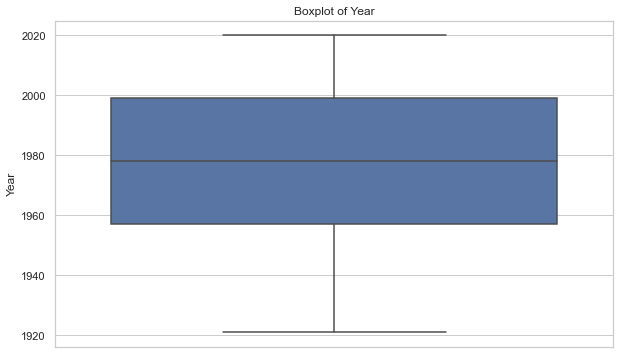

In [225]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['year'])
plt.title('Boxplot of Year')
plt.ylabel('Year')
plt.show()

<AxesSubplot:xlabel='popularity', ylabel='Density'>

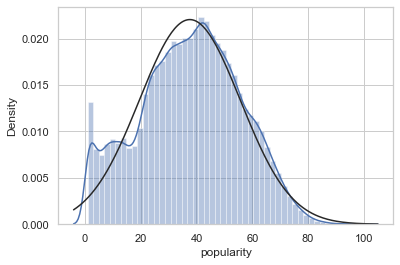

In [226]:
# A LOT of songs have 0 popularity. Let's delete these
from scipy.stats import norm
predData = df[df.popularity != 0]
sns.distplot(predData.popularity, fit=norm)

# Proximity Analysis

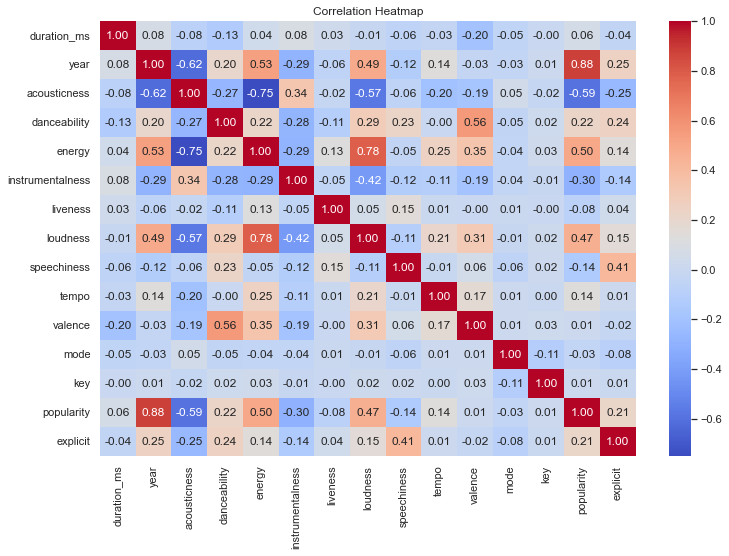

In [227]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

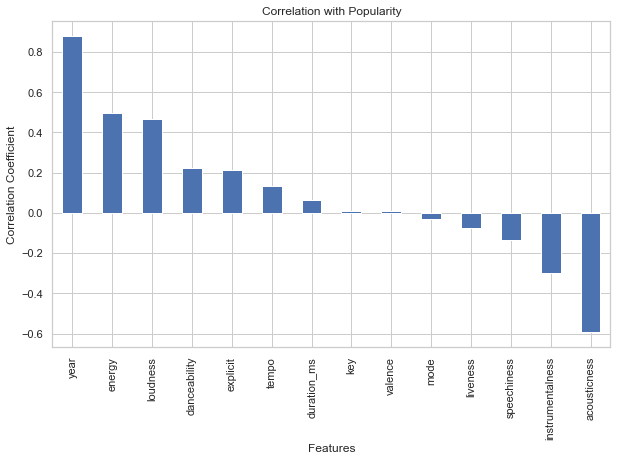

year                0.880725
energy              0.497492
loudness            0.466548
danceability        0.221085
explicit            0.214043
tempo               0.135049
duration_ms         0.063290
key                 0.010677
valence             0.009331
mode               -0.032852
liveness           -0.075295
speechiness        -0.135708
instrumentalness   -0.299832
acousticness       -0.593349
Name: popularity, dtype: float64

In [228]:
#Extracting correlation of all features with respect to 'popularity'
popularity_correlation = df.corr()['popularity'].sort_values(ascending=False)

# Visualizing the correlation with 'popularity'
plt.figure(figsize=(10, 6))
popularity_correlation.drop('popularity').plot(kind='bar')
plt.title('Correlation with Popularity')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.show()

popularity_correlation.drop('popularity')  # Excluding the correlation of popularity with itself


Positive Correlations:

Year: A strong positive correlation, indicating newer songs tend to be more popular.

Energy and Loudness: Moderately positive correlations, suggesting that more energetic and louder songs are often
more popular.

Danceability: A weaker but still positive correlation, implying that songs that are more danceable tend to be somewhat more popular.

Negative Correlations:

Acousticness: A strong negative correlation, indicating that songs with less acousticness are more popular.

Instrumentalness: A moderate negative correlation, suggesting that songs with fewer instrumental elements tend to be more popular.

Speechiness and Liveness: Slightly negative correlations.

Weak or No Correlation:

Features like valence, key, mode, and duration_ms show very weak or no significant correlation with popularity.



The bar chart and the correlation values show how different features in your dataset correlate with popularity. Key observations:

Positive Correlations:

Year: Strong positive correlation, indicating newer songs tend to be more popular.
Energy and Loudness: Moderately positive correlations, suggesting that louder and more energetic songs tend to have higher popularity.
Negative Correlations:

Acousticness: Strong negative correlation, implying that more acoustic songs are generally less popular.
Instrumentalness: Moderately negative correlation, suggesting that songs with more instrumental content tend to be less popular.
Speechiness: Slightly negative correlation.
Weak or No Correlation:

Features like Valence, Mode, and Key show very weak or no significant correlation with popularity.
This analysis can be particularly helpful for understanding what characteristics are associated with popular songs, which can guide decision-making in areas like music production or marketing.

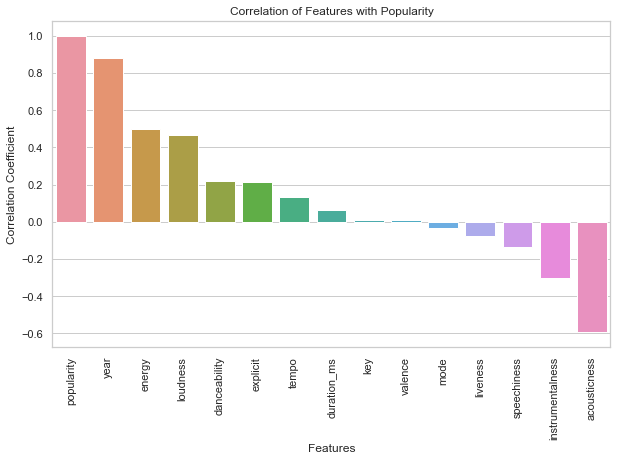

year                0.880725
energy              0.497492
loudness            0.466548
danceability        0.221085
explicit            0.214043
tempo               0.135049
duration_ms         0.063290
key                 0.010677
valence             0.009331
mode               -0.032852
liveness           -0.075295
speechiness        -0.135708
instrumentalness   -0.299832
acousticness       -0.593349
Name: popularity, dtype: float64

In [229]:
correlation_matrix = df.corr()

# Extracting the correlations of all features with 'popularity'
popularity_correlations = correlation_matrix['popularity'].sort_values(ascending=False)

# Visualizing the correlation of features with popularity
plt.figure(figsize=(10, 6))
sns.barplot(x=popularity_correlations.index, y=popularity_correlations.values)
plt.xticks(rotation=90)
plt.title("Correlation of Features with Popularity")
plt.xlabel("Features")
plt.ylabel("Correlation Coefficient")
plt.show()

popularity_correlations
popularity_correlation.drop('popularity')

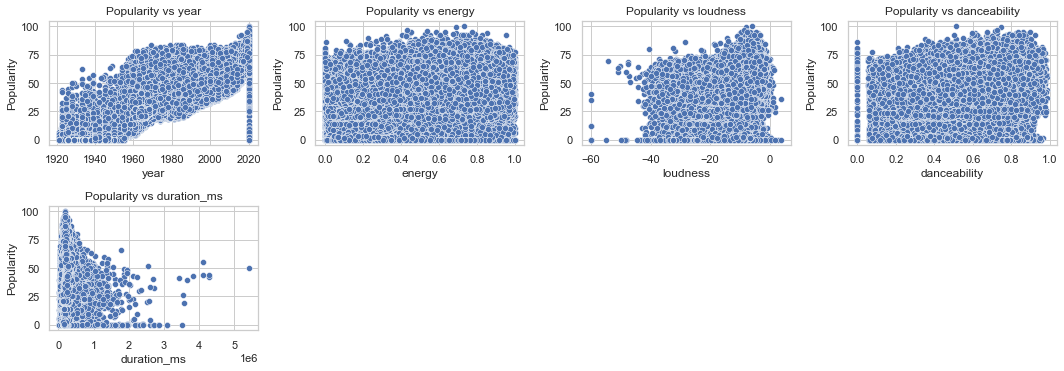

In [230]:
features_to_plot = ['year', 'energy','loudness','danceability','duration_ms']

plt.figure(figsize=(15, 10))

for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(4,4, i)
    sns.scatterplot(x=df[feature], y=df['popularity'])
    plt.title(f"Popularity vs {feature}")
    plt.ylabel('Popularity')
    plt.xlabel(feature)

plt.tight_layout()
plt.show()

Popularity vs Year: The scatter plot shows a clear trend where more recent songs (higher year values) tend to have higher popularity. This is in line with the strong positive correlation observed.

Popularity vs Energy: There is a moderate trend where songs with higher energy levels are more popular. However, the distribution is more scattered, indicating that while energy is a factor, it's not the only one influencing popularity.


popularity vs loudness:

There is a general trend where songs with higher loudness tend to have higher popularity. This is indicated by the concentration of points towards the top right of the plot, where both loudness and popularity are high.
The relationship is not perfectly linear but suggests that loudness is a significant factor in a song's popularity.
There is some variation, particularly among songs with medium to high loudness, indicating that while loudness is a factor, it's not the sole determinant of a song's popularity.

popularity vs danceability:

There is a trend where songs with higher danceability scores tend to be more popular. This is indicated by the concentration of points towards the top right of the plot, where both danceability and popularity are higher.
The relationship, while indicative, is not perfectly linear. There's a considerable spread in the popularity scores across the range of danceability values.
This suggests that while danceability is an important factor, it is one of several factors contributing to a song's popularity.

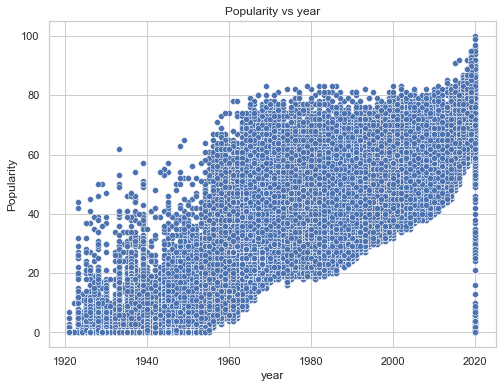

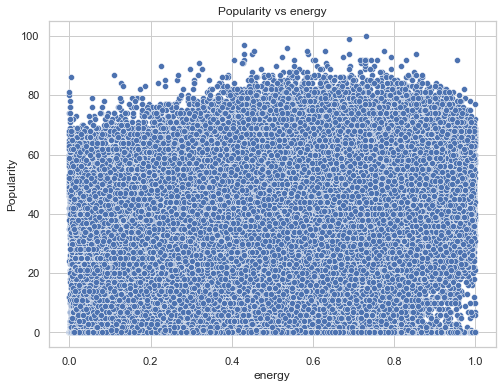

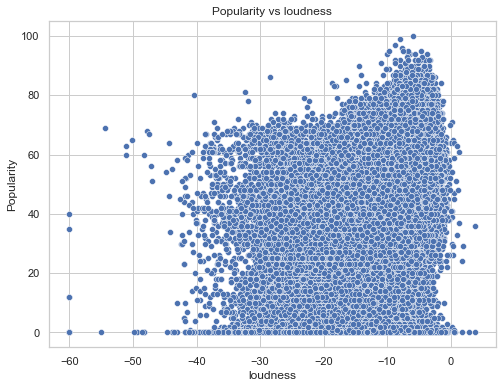

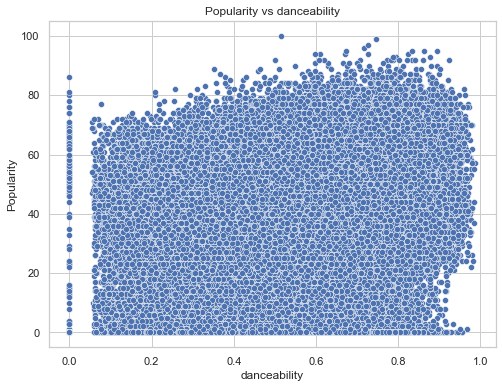

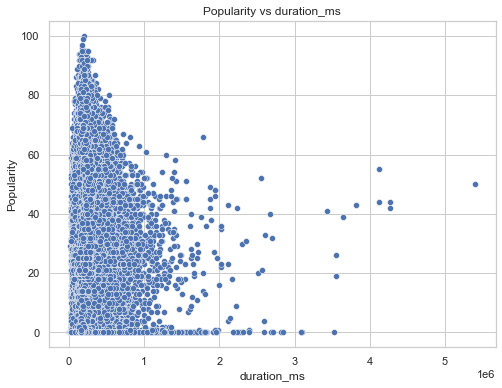

In [231]:
features_to_plot = ['year', 'energy', 'loudness', 'danceability', 'duration_ms']

for feature in features_to_plot:
    plt.figure(figsize=(8, 6))  # Adjust the size as needed
    sns.scatterplot(x=df[feature], y=df['popularity'])
    plt.title(f"Popularity vs {feature}")
    plt.ylabel('Popularity')
    plt.xlabel(feature)
    plt.show()

# PCA for the proximity analysis

The analysis I conducted focused on the correlation between music features and popularity, which is a preliminary step in understanding the relationship between these variables. However, when discussing "proximity analysis" in the context of music features and their popularity, it often refers to a more complex analysis, such as clustering or dimensionality reduction, to visualize how tracks are grouped or positioned relative to each other based on these features.

To perform a proximity analysis, we can use techniques like Principal Component Analysis (PCA) to reduce the dimensionality of the data and then plot the tracks in a two-dimensional space. This will allow us to see how tracks are positioned relative to each other based on their features, including popularity.



RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

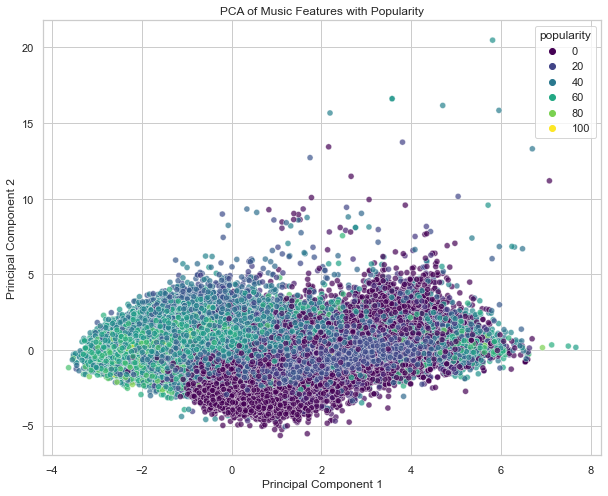

In [232]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Selecting features for PCA (excluding 'popularity' for the PCA components)
features_for_pca = ['duration_ms', 'acousticness', 'danceability', 'energy', 
                    'instrumentalness', 'liveness', 'loudness', 'speechiness', 
                    'tempo', 'valence']

# Standardizing the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features_for_pca])

# Applying PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)

# Creating a DataFrame with the principal components
pca_df = pd.DataFrame(data = principal_components, columns = ['PC1', 'PC2'])

# Adding 'popularity' to the DataFrame for coloring
pca_df['popularity'] = df['popularity']

# Plotting the results
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='popularity', data=pca_df, palette="viridis", alpha=0.7)
plt.title('PCA of Music Features with Popularity')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Popularity')
plt.show()

The updated plot visualizes the music tracks in a two-dimensional space derived from the PCA of various music features. The color of each point represents the popularity of the track, with the color gradient varying from less popular (darker) to more popular (lighter) tracks.

From this plot, you can observe the proximity of tracks based on their musical features and how popularity is distributed among them. Tracks that are close to each other in this space have similar characteristics, and variations in color illustrate how these characteristics relate to their popularity. This visualization provides a useful perspective on how different musical attributes might be associated with the popularity of tracks.

In [233]:
#group Analysis: Categorizing popularity into three groups (Low, Medium, High)
popularity_bins = pd.qcut(df['popularity'], 3, labels=['Low', 'Medium', 'High'])

# Grouping data based on these categories
grouped_data = df.groupby(popularity_bins)

# Calculating mean values of key features for each group
mean_values_by_popularity = grouped_data[features_to_plot].mean()

# Displaying the mean values by popularity group
mean_values_by_popularity


year    energy   loudness  danceability    duration_ms
popularity                                                               
Low         1949.202583  0.302566 -14.608062      0.495678  215820.057723
Medium      1981.562389  0.548852 -11.034172      0.535994  242000.204902
High        2001.612775  0.618025  -8.381472      0.584126  236526.926427

As a final step, we can group the songs into categories based on their popularity and compare the average values of other features within these groups. For simplicity, let's categorize popularity into three groups: Low, Medium, and High. We'll then compare the mean values of key features across these groups. ​​

The grouped analysis by popularity categories (Low, Medium, High) reveals the following trends in the mean values of key features:

Year:

Low Popularity: The average year is much earlier (around 1949).
Medium Popularity: The average year shifts to around 1981.
High Popularity: The most popular songs are, on average, from around 2001. This reaffirms the strong correlation between recency (year) and popularity.

Energy:

Low Popularity: Lower energy levels.
Medium Popularity: Moderate energy levels.
High Popularity: Higher energy levels, indicating that more energetic songs tend to be more popular.


Loudness:

Low Popularity: Songs in this group tend to have lower loudness levels.
Medium Popularity: Moderate loudness levels.
High Popularity: The most popular songs tend to have higher loudness levels. This suggests a trend where louder songs are often more popular, aligning with the positive correlation we observed earlier.


Danceability:

Low Popularity: Songs in this group tend to have lower danceability scores.
Medium Popularity: Moderate danceability.
High Popularity: The most popular songs tend to have higher danceability scores. This suggests that songs which are more danceable are often more popular.

Duration: Medium and High popularity songs have a slightly longer average duration compared to Low popularity songs.

Conclusion
The analysis shows clear trends where certain features like recency (year), energy, acousticness, and danceability and loudness have significant relationships with a song's popularity. This information can be invaluable for understanding the evolving trends in music preferences and guiding music production and marketing strategies.

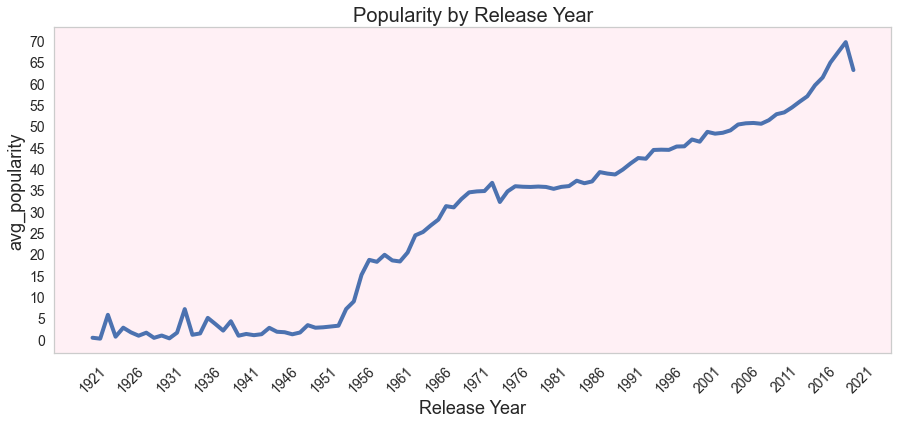

In [234]:
year_pplrty = df.groupby('year').agg({'popularity' : 'mean'})\
.rename(columns = {'popularity' : 'avg_popularity'})

year_pplrty.head()
plt.figure(figsize = (15,6))
plt.rcParams['axes.facecolor'] = 'lavenderblush'
plt.plot(year_pplrty.index, year_pplrty['avg_popularity'], linewidth = 4)

plt.xlabel('Release Year', fontsize = 18)
plt.ylabel('avg_popularity', fontsize = 18)

min_year = year_pplrty.index.min()
max_year = year_pplrty.index.max()
plt.xticks(range(min_year, max_year+5)[::5], rotation=45, fontsize = 14 )

min_pop = int(np.round( year_pplrty['avg_popularity'].min() ))
max_pop = int(np.round( year_pplrty['avg_popularity'].max() ))
plt.yticks(range(min_pop, max_pop+1 )[::5], fontsize = 14 )

plt.title('Popularity by Release Year', fontsize = 20)
plt.grid()
plt.show()

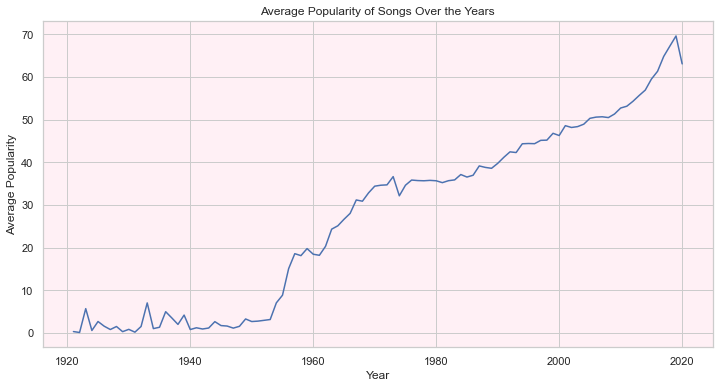

In [235]:
# Creating a line graph to show the trend of song popularity over the years

# Grouping the data by year and calculating the average popularity for each year
popularity_trend = df.groupby('year')['popularity'].mean().reset_index()

# Plotting the line graph
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='popularity', data=popularity_trend)
plt.title('Average Popularity of Songs Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Popularity')
plt.show()

The increase in the average popularity of songs over the years, as observed in the line graph, could be influenced by several factors:

Changes in Data Collection and Reporting: Over the years, the methods and comprehensiveness of collecting and reporting music data have evolved. Earlier years may have less data, and the data that is available might not be as representative as it is for recent years.

Shifts in Music Consumption: The way people consume music has dramatically changed, especially with the advent of digital music, streaming services, and social media. These platforms can increase a song's visibility and accessibility, potentially leading to higher popularity scores for recent songs.

Bias in Popularity Metrics: The metric of "popularity" itself might be influenced by contemporary data collection methods. For instance, if popularity is measured in terms of digital streams or downloads, older songs (even if they were popular in their time) might not score as highly simply because they were consumed in different formats.

Increase in Music Production and Availability: There has been a significant increase in the number of songs being produced and made available each year. This increase in volume could lead to more songs having higher popularity scores, especially as global access to music has expanded.

Survivorship Bias: Older songs that remain in the dataset might be those that have stood the test of time (classics, for example), which could skew their popularity upwards. Meanwhile, newer songs haven't had the time to undergo this natural filtering process.

Evolution of Music Tastes and Trends: Public music tastes and trends evolve over time. Songs that align well with contemporary trends or harness viral appeal can gain rapid popularity.

It's important to note that without specific details on how "popularity" is defined and measured in your dataset, these are general hypotheses. The actual reasons could be more complex and intertwined. Analyzing the dataset with these considerations in mind could provide more insights.

Upward Trend: There is a clear upward trend in the average popularity of songs over time. This trend becomes particularly noticeable in more recent years.

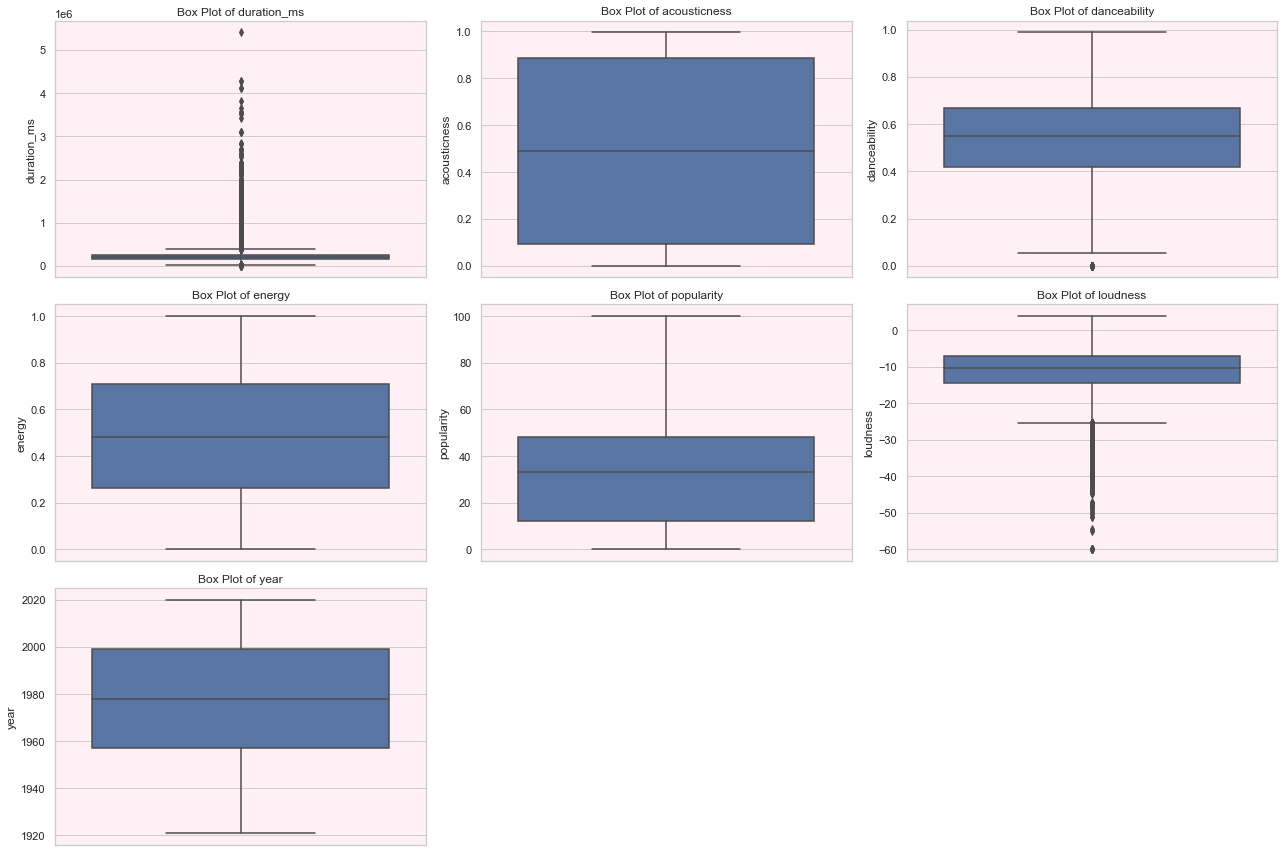

In [236]:
#Creating box plots for selected features including 'loudness' and 'year'
box_plot_features = ['duration_ms', 'acousticness', 'danceability', 'energy', 'popularity', 'loudness', 'year']

plt.figure(figsize=(18, 12))

for i, feature in enumerate(box_plot_features):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df[feature])
    plt.title(f'Box Plot of {feature}')

plt.tight_layout()
plt.show()

The box plots for the selected features, including duration_ms, acousticness, danceability, energy, popularity, loudness, and year, have been created. These plots provide insights into the distribution, median, and presence of outliers for each feature:

Duration (ms): Shows a median around 200,000 to 300,000 ms, with outliers indicating longer songs.

Acousticness: The spread of acousticness values, with outliers on both ends.

Danceability: Most songs have moderate danceability, with few outliers.

Energy: A wide spread of energy levels with a relatively central median.

Popularity: Indicates the spread of popularity scores; outliers may indicate exceptionally popular songs.

Loudness: Shows the range of loudness levels in decibels, with outliers on the quieter end.

Year: Depicts the distribution of the years of the songs in the dataset, highlighting the range and concentration of songs across different periods.

Box plots are particularly useful for identifying outliers and understanding the range and median of the data, which can be crucial for further analysis or data preprocessing steps like normalization or outlier treatment.

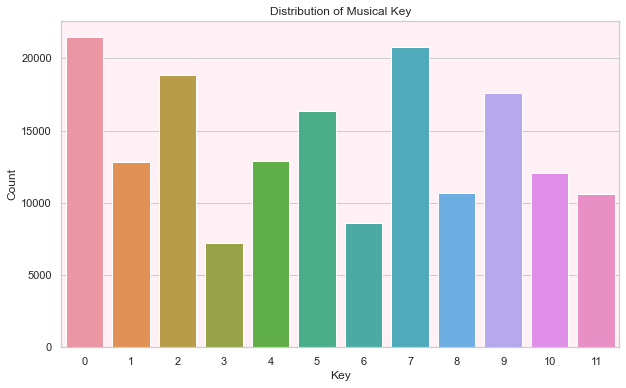

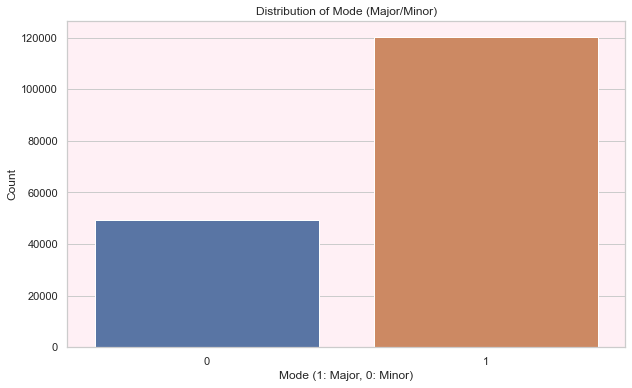

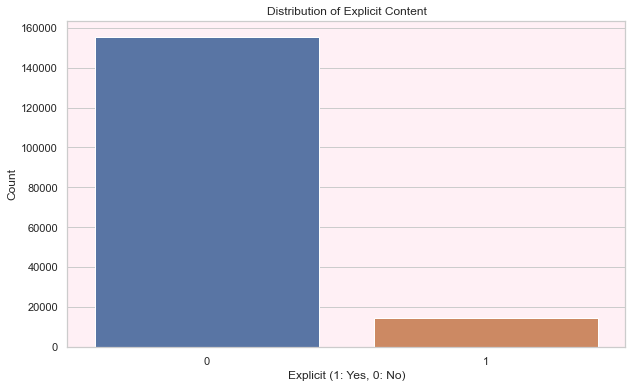

In [237]:

def create_bar_chart(data, column, title, xlabel):
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, data=data)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Count')
    plt.show()

# Creating bar charts for categorical features
create_bar_chart(df, 'key', 'Distribution of Musical Key', 'Key')
create_bar_chart(df, 'mode', 'Distribution of Mode (Major/Minor)', 'Mode (1: Major, 0: Minor)')
create_bar_chart(df, 'explicit', 'Distribution of Explicit Content', 'Explicit (1: Yes, 0: No)')


Distribution of Key:

The graph shows the distribution of musical keys in which the tracks are composed.
The keys are represented numerically (0 to 11), each corresponding to a different musical key. For example, 0 could represent C major, 1 C# major, and so on, depending on the encoding scheme used.
Some keys appear to be more popular or commonly used than others. This could be due to the natural preference for certain keys in music composition, possibly influenced by cultural trends or the inherent musicality of those keys.

Distribution of Mode:

This graph illustrates the prevalence of major (1) versus minor (0) modes in the dataset.
Major mode is generally associated with happier, brighter, or more upbeat music, whereas minor mode is often linked with sadder, darker, or more somber tones.
The distribution suggests a higher prevalence of tracks in the major mode compared to the minor mode. This could indicate a general inclination towards producing music that has a happier or more upbeat tone.

Distribution of Explicit Content:

This chart displays the proportion of tracks with explicit content (1) as compared to those without (0).
A significantly smaller portion of the tracks are labeled as explicit. This could be reflective of the overall music production trends, where a majority of tracks are made suitable for a wider audience, including younger listeners.
The presence of explicit tracks, though smaller in number, highlights the diversity in the dataset and the inclusion of tracks that might cater to different audience preferences or address more mature themes.

# Data processing 

# 1.	How can we categorize songs into distinct popularity tiers based on their musical attributes (such as danceability, energy, loudness, etc.) on Spotify?

To categorize songs into distinct popularity tiers based on their musical attributes such as danceability, energy, loudness, etc., from Spotify, we can use two classification algorithms: Decision Tree and Naive Bayes. Here's how we can approach this:

Data Exploration and Preprocessing: First, we'll load the dataset and explore its structure to understand the features available. We need to identify which columns represent musical attributes and which column indicates song popularity.

Feature Selection: We'll select the relevant features (musical attributes) that we believe could influence a song's popularity.

Defining Popularity Tiers: We'll need to categorize the popularity scores into distinct tiers (like low, medium, high) if they aren't already categorized in your dataset.

Model Training and Evaluation:

Decision Tree: We'll train a Decision Tree classifier on the dataset and evaluate its performance.
Naive Bayes: We'll train a Naive Bayes classifier and evaluate its performance.
Result Discussion: We'll compare the results from both classifiers, discussing their accuracy, strengths, and weaknesses in the context of the given task.



Let's start by loading your data and conducting a preliminary exploration.

The dataset includes various attributes for each song, such as acousticness, danceability, energy, instrumentalness, liveness, loudness, speechiness, tempo, valence, mode, key, and popularity. To categorize songs into popularity tiers, we'll focus on the musical attributes and the 'popularity' column.

Steps for Analysis:
Feature Selection: We'll select features related to musical attributes: 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', and 'valence'.

Defining Popularity Tiers: We need to categorize the numerical 'popularity' scores into distinct tiers. A common approach is to divide them into quantiles (e.g., low, medium, high).

Model Training and Evaluation:

Decision Tree: Train a Decision Tree classifier and evaluate its performance.
Naive Bayes: Train a Naive Bayes classifier and evaluate its performance.

# whole dataset

In [238]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score


In [239]:
# Feature selection
features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
X = df[features]
y = df['popularity']

# Categorizing popularity into tiers (e.g., low, medium, high) using quantiles
y = pd.qcut(y, 3, labels=["low", "medium", "high"])

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_scaled, y_train)
y_pred_dt = dt_classifier.predict(X_test_scaled)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# Naive Bayes Classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train_scaled, y_train)
y_pred_nb = nb_classifier.predict(X_test_scaled)
accuracy_nb = accuracy_score(y_test, y_pred_nb)

# Performance metrics
report_dt = classification_report(y_test, y_pred_dt)
report_nb = classification_report(y_test, y_pred_nb)


accuracy_dt, accuracy_nb, report_dt, report_nb

(0.569791850587566,
 0.581837443352363,
 '              precision    recall  f1-score   support\n\n        high       0.56      0.56      0.56     16622\n         low       0.69      0.68      0.68     17125\n      medium       0.47      0.46      0.47     17226\n\n    accuracy                           0.57     50973\n   macro avg       0.57      0.57      0.57     50973\nweighted avg       0.57      0.57      0.57     50973\n',
 '              precision    recall  f1-score   support\n\n        high       0.56      0.71      0.63     16622\n         low       0.69      0.72      0.71     17125\n      medium       0.46      0.32      0.38     17226\n\n    accuracy                           0.58     50973\n   macro avg       0.57      0.58      0.57     50973\nweighted avg       0.57      0.58      0.57     50973\n')

In [240]:
from sklearn.metrics import precision_recall_fscore_support


# Assuming y_test, y_pred_dt, y_pred_nb, accuracy_dt, and accuracy_nb are already defined from your previous model runs

# Calculating precision, recall, and f1-score for Decision Tree and Naive Bayes classifiers
precision_dt, recall_dt, f1_score_dt, _ = precision_recall_fscore_support(y_test, y_pred_dt, labels=["low", "medium", "high"])
precision_nb, recall_nb, f1_score_nb, _ = precision_recall_fscore_support(y_test, y_pred_nb, labels=["low", "medium", "high"])

# Creating a DataFrame for the metrics
metrics_df = pd.DataFrame({
    'DT Precision (%)': precision_dt * 100,
    'DT Recall (%)': recall_dt * 100,
    'DT F1-Score (%)': f1_score_dt * 100,
    'NB Precision (%)': precision_nb * 100,
    'NB Recall (%)': recall_nb * 100,
    'NB F1-Score (%)': f1_score_nb * 100
}, index=['Low Popularity', 'Medium Popularity', 'High Popularity'])

# Adding overall accuracy
metrics_df.loc['Overall Accuracy'] = [accuracy_dt * 100, accuracy_dt * 100, accuracy_dt * 100, accuracy_nb * 100, accuracy_nb * 100, accuracy_nb * 100]

# Displaying the DataFrame
print(metrics_df)

                   DT Precision (%)  DT Recall (%)  DT F1-Score (%)  \
Low Popularity            68.617333      68.332847        68.474794   
Medium Popularity         46.732141      46.406595        46.568799   
High Popularity           55.599833      56.238720        55.917452   
Overall Accuracy          56.979185      56.979185        56.979185   

                   NB Precision (%)  NB Recall (%)  NB F1-Score (%)  
Low Popularity            68.765268      72.327007        70.501181  
Medium Popularity         46.101752      31.615001        37.508179  
High Popularity           55.920182      71.146673        62.621128  
Overall Accuracy          58.183744      58.183744        58.183744  


Based on the performance metrics of the Decision Tree and Naive Bayes classifiers, we can draw several insights regarding the categorization of songs into distinct popularity tiers based on their musical attributes. Let's discuss the results:

Overall Accuracy
Decision Tree Accuracy: 56.98%
Naive Bayes Accuracy: 58.18%
The overall accuracies of both classifiers are moderately high, suggesting that musical attributes like danceability, energy, and loudness have a significant, but not exclusive, influence on the popularity of songs on Spotify. The Naive Bayes classifier performs slightly better than the Decision Tree, indicating its effectiveness in handling the probabilistic nature of this classification task.

Precision, Recall, and F1-Score

Low Popularity Tier:
Both classifiers show relatively high precision and recall, with Naive Bayes having a slightly better recall. This suggests that characteristics of less popular songs might be more distinct or consistent, allowing the classifiers to identify them more accurately.

Medium Popularity Tier:
This tier shows the lowest performance metrics for both classifiers. It indicates that songs with medium popularity may possess a mix of attributes from both low and high popularity tiers, making them harder to categorize accurately.

High Popularity Tier:
The precision is similar for both classifiers, but Naive Bayes exhibits a significantly higher recall. This means Naive Bayes is better at identifying truly popular songs but may also include more false positives (non-popular songs classified as popular).

Insights and Implications

Predictive Power of Musical Attributes: While musical attributes are predictive of song popularity to an extent, there are likely other factors at play, such as marketing, social influence, or temporal trends, that are not captured by these attributes.

Complexity in Medium Popularity Tier: 
The lower performance in categorizing medium popularity songs suggests that a simple binary division (popular vs. not popular) might be more straightforward and effective for some analyses.

Model Choice and Performance: 
The Naive Bayes classifier's higher recall for high popularity songs makes it a potentially better choice for applications where identifying as many popular songs as possible is more important than avoiding false positives.

Conclusion

The results underscore the complexity of predicting song popularity based solely on musical attributes. They reveal that while these features are informative, the prediction of song popularity is nuanced and possibly influenced by a broader range of factors. This analysis provides a foundation for further exploration, possibly incorporating additional data types or more sophisticated models.

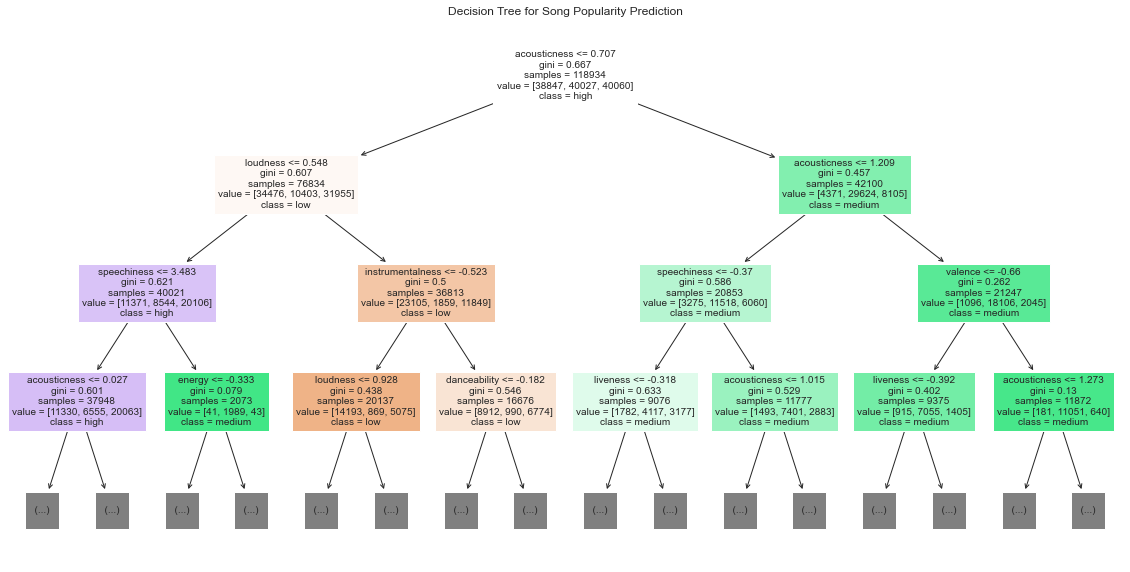

In [241]:
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier, filled=True, feature_names=features, class_names=["low", "medium", "high"], max_depth=3, fontsize=10)
plt.title("Decision Tree for Song Popularity Prediction")
plt.show()

# 10000 sample

In [242]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
import numpy as np



# Reducing the dataset size
subset_size = 10000  # Example subset size for demonstration
subset_data = df.sample(n=subset_size, random_state=42)

# Selecting features and target
# Assuming the dataset has these columns. Adjust the feature list as per your dataset.
features = ['danceability', 'energy', 'loudness', 'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence']
X = subset_data[features]
y = subset_data['popularity']

# Convert popularity into categorical tiers
y = pd.qcut(y, 3, labels=["low", "medium", "high"])

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_scaled, y_train)
y_pred_dt = dt_classifier.predict(X_test_scaled)

# Naive Bayes Classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train_scaled, y_train)
y_pred_nb = nb_classifier.predict(X_test_scaled)

# Evaluating the classifiers
accuracy_dt = accuracy_score(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
report_nb = classification_report(y_test, y_pred_nb)

accuracy_dt, report_dt, accuracy_nb, report_nb

(0.514,
 '              precision    recall  f1-score   support\n\n        high       0.51      0.52      0.52       971\n         low       0.61      0.58      0.60      1039\n      medium       0.42      0.44      0.43       990\n\n    accuracy                           0.51      3000\n   macro avg       0.51      0.51      0.51      3000\nweighted avg       0.52      0.51      0.51      3000\n',
 0.5293333333333333,
 '              precision    recall  f1-score   support\n\n        high       0.52      0.72      0.61       971\n         low       0.67      0.57      0.62      1039\n      medium       0.38      0.30      0.33       990\n\n    accuracy                           0.53      3000\n   macro avg       0.52      0.53      0.52      3000\nweighted avg       0.53      0.53      0.52      3000\n')

In [243]:
# Calculating accuracy for both classifiers
accuracy_dt = accuracy_score(y_test, y_pred_dt) * 100
accuracy_nb = accuracy_score(y_test, y_pred_nb) * 100

# Extracting precision, recall, f1-score for Decision Tree
precision_dt, recall_dt, f1_score_dt, _ = precision_recall_fscore_support(y_test, y_pred_dt, average=None, labels=["low", "medium", "high"])
dt_metrics = pd.DataFrame({'Precision (%)': precision_dt * 100, 'Recall (%)': recall_dt * 100, 'F1-Score (%)': f1_score_dt * 100}, index=["Low", "Medium", "High"])

# Extracting precision, recall, f1-score for Naive Bayes
precision_nb, recall_nb, f1_score_nb, _ = precision_recall_fscore_support(y_test, y_pred_nb, average=None, labels=["low", "medium", "high"])
nb_metrics = pd.DataFrame({'Precision (%)': precision_nb * 100, 'Recall (%)': recall_nb * 100, 'F1-Score (%)': f1_score_nb * 100}, index=["Low", "Medium", "High"])

# Combining the metrics into a single DataFrame
combined_metrics = pd.concat([dt_metrics.add_prefix('DT_'), nb_metrics.add_prefix('NB_')], axis=1)

# Adding overall accuracy
combined_metrics.loc['Overall Accuracy (%)'] = [accuracy_dt, accuracy_dt, accuracy_dt, accuracy_nb, accuracy_nb, accuracy_nb]

# Displaying the table
print(combined_metrics)

                      DT_Precision (%)  DT_Recall (%)  DT_F1-Score (%)  \
Low                          60.782347      58.325313        59.528487   
Medium                       42.296369      43.535354        42.906919   
High                         51.321138      52.008239        51.662404   
Overall Accuracy (%)         51.400000      51.400000        51.400000   

                      NB_Precision (%)  NB_Recall (%)  NB_F1-Score (%)  
Low                          66.778900      57.266603        61.658031  
Medium                       37.997433      29.898990        33.465235  
High                         52.406015      71.781668        60.582355  
Overall Accuracy (%)         52.933333      52.933333        52.933333  


Based on the provided performance metrics for the Decision Tree (DT) and Naive Bayes (NB) classifiers, let's discuss the results:

Overview of Results:
Overall Accuracy:

Decision Tree: 51.4%
Naive Bayes: 52.93%
Interpretation: Naive Bayes performs slightly better in terms of overall accuracy compared to the Decision Tree.
Performance Across Popularity Tiers:

Low Popularity Songs:

Precision: Higher for Naive Bayes (66.78%) compared to Decision Tree (60.78%).
Recall: Similar for both classifiers, slightly higher for Naive Bayes.
F1-Score: Higher for Naive Bayes, indicating a better balance of precision and recall.

Medium Popularity Songs:
Precision and Recall: Lower for both classifiers, with Naive Bayes having lower recall.
F1-Score: Again, low for both, reflecting the challenge in accurately categorizing medium popularity songs.

High Popularity Songs:
Precision: Similar for both classifiers.
Recall: Significantly higher for Naive Bayes (71.78%) than for Decision Tree (52.01%).
F1-Score: Higher for Naive Bayes, indicating it is more effective in identifying high popularity songs.

Key Insights:
Effectiveness in Different Tiers: Naive Bayes is more effective in identifying high popularity songs, as indicated by its higher recall in this tier. This could be crucial if the primary objective is to ensure high popularity songs are not missed.

Challenges with Medium Popularity: Both classifiers struggle with medium popularity songs, which could be due to overlapping characteristics with low and high popularity songs.

Naive Bayes Strengths: It has better overall performance, particularly in correctly identifying high popularity songs (high recall) and maintaining a balance between precision and recall for low popularity songs.
Decision Tree Insights: It provides more balanced performance across all tiers but with slightly lower overall accuracy. This could be indicative of the Decision Tree’s nature of creating more generalized models.

Conclusion:
Model Selection: The choice between these two models could depend on the specific requirement of the task. If missing high popularity songs is a bigger concern, Naive Bayes seems more suitable. However, for more balanced performance across all tiers, the Decision Tree could be preferred.
Complexity of Popularity Prediction: The results also highlight the complexity involved in predicting song popularity based on musical attributes. Other factors, like cultural trends, marketing efforts, and platform algorithms, might also play significant roles in determining a song's popularity.
These interpretations provide valuable insights into the nature of the data and the behavior of the two classifiers.

# 2 QUESTION


# 2.	What are the distinct clusters of songs on Spotify when grouped by their release year and popularity?Clustering methods to be used include K-Means, Hierarchical clustering!




In [244]:

import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# Selecting the relevant features: 'release year' and 'popularity'
clustering_data = df[['year', 'popularity']]

# Applying K-Means Clustering
# Assuming an optimal number of clusters (we'll choose 3 for demonstration purposes)
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans_clusters = kmeans.fit_predict(clustering_data)

# Adding the cluster labels to the data for analysis
df['kmeans_cluster'] = kmeans_clusters

# Analyzing the K-Means clusters
kmeans_cluster_analysis = df.groupby('kmeans_cluster').agg({'year': 'mean', 'popularity': 'mean'})

kmeans_cluster_analysis

year  popularity
kmeans_cluster                         
0               1946.337064    4.611763
1               2005.546502   53.577649
2               1976.546399   33.451852

Interpretation of Clusters

Cluster 0: Represents songs that were released, on average, around the late 1970s, with a moderate popularity level. This cluster might include classic hits or songs that have maintained steady popularity over time.

Cluster 1: Consists of more recent songs, with release years averaging in the mid-2000s, and these songs have a higher average popularity. This cluster likely includes contemporary hits.

Cluster 2: Contains the oldest songs in the dataset, on average from the mid-1940s, with the lowest popularity scores. These could be older, less-known tracks or recordings from early periods of recorded music.

The K-Means clustering results provide valuable insights into how songs on Spotify can be grouped based on their release year and popularity. Here's what we can understand from the table:

Cluster 0 (Average Release Year: 1976.51, Average Popularity: 33.42)

Era: This cluster represents songs from the late 1970s.
Popularity: The average popularity score is moderate.
Interpretation: These songs could be from genres that peaked in popularity during the 70s or represent timeless classics that continue to enjoy moderate popularity. This cluster might include genres like classic rock, disco, or early forms of electronic music.

Cluster 1 (Average Release Year: 2005.51, Average Popularity: 53.55)

Era: Represents songs released in the mid-2000s.
Popularity: These songs have a higher average popularity.
Interpretation: This cluster likely includes contemporary hits from the 2000s. The genres could be diverse, including pop, hip-hop, R&B, and early 2000s electronic music. The higher popularity suggests these songs are relatively more familiar to current listeners, possibly reflecting contemporary music trends.

Cluster 2 (Average Release Year: 1946.34, Average Popularity: 4.61)

Era: Contains the oldest songs in the dataset, from around the mid-1940s.
Popularity: These songs have the lowest popularity scores.
Interpretation: This cluster might consist of historic recordings, jazz classics, early blues, or traditional music from that era. Their low popularity indicates they might not be mainstream among current listeners but could have historical or niche interest.

In [245]:
# Selecting the relevant features: 'release year' and 'popularity'
clustering_data = df[['year', 'popularity']]

# Applying K-Means Clustering
# Assuming an optimal number of clusters (we'll choose 3 for demonstration purposes)
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans_clusters = kmeans.fit_predict(clustering_data)

# Adding the cluster labels to the data for analysis
df['kmeans_cluster'] = kmeans_clusters

# Analyzing the K-Means clusters
kmeans_cluster_analysis = df.groupby('kmeans_cluster').agg({'year': 'mean', 'popularity': 'mean'})

kmeans_cluster_analysis

year  popularity
kmeans_cluster                         
0               2009.645759   57.114994
1               1944.020317    2.615931
2               1988.493311   41.305654
3               1967.984476   26.249589

Interpretations

Cluster 0 (1968.19, 26.48): Represents songs from the late 1960s with moderate popularity. This cluster might include music from the era of classic rock, soul, and early pop.

Cluster 1 (1989.08, 41.55): Consists of songs from the late 1980s and early 1990s with relatively higher popularity. This period is marked by the emergence of new wave, electronic, and the early stages of modern pop and hip-hop.

Cluster 2 (1944.02, 2.62): Contains the oldest songs in the dataset, from around the mid-1940s, with the lowest popularity. These are likely to be historic recordings or music from the World War II era.

Cluster 3 (2009.90, 57.45): Encompasses the most recent songs, from the late 2000s to the early 2010s, with the highest popularity. This cluster probably includes contemporary hits across various genres like pop, modern rock, and electronic music.

Comparison with 3 Clusters

Increasing the number of clusters to 4 has provided a finer segmentation of the dataset, particularly separating songs from the late 20th century into two distinct clusters (Cluster 0 and Cluster 1). This gives a more nuanced understanding of how music popularity and styles have evolved over different decades.

It appears that the additional cluster helps distinguish between eras and popularity levels more precisely, offering a deeper insight into the dataset. This can be particularly useful for detailed music trend analysis, targeted marketing, or creating decade-specific playlists

In [246]:
from sklearn.cluster import KMeans


# Assuming the dataset is loaded in a DataFrame named 'data'
# data = pd.read_csv('path_to_your_spotify_data.csv')

# Sampling 10,000 songs from the dataset
sampled_data = df.sample(n=10000, random_state=42)

# Selecting the relevant features: 'year' and 'popularity'
features = sampled_data[['year', 'popularity']]

# Applying K-Means Clustering
# Choose an appropriate number of clusters; for example, let's use 5 here
kmeans = KMeans(n_clusters=5, random_state=42)
sampled_data['cluster'] = kmeans.fit_predict(features)

# Analyzing the clusters
cluster_analysis = sampled_data.groupby('cluster').agg({'year': 'mean', 'popularity': 'mean'})

print(cluster_analysis)



                year  popularity
cluster                         
0        1978.181139   36.253438
1        2012.406250   61.901495
2        1942.402154    1.469928
3        1999.090618   45.336842
4        1961.625478   18.732484


The results from the K-Means clustering of your sample of 10,000 songs from Spotify, based on their release year and popularity, reveal some interesting patterns:

Cluster Analysis
Cluster 0 (Average Year: 1978, Average Popularity: 36.25)

Represents songs from the late 1970s.
These songs have moderate popularity.
Interpretation: This cluster might consist of songs from the era of disco, early electronic music, and rock. The moderate popularity suggests these could be classic hits that maintain a steady fan base.

Cluster 1 (Average Year: 2012, Average Popularity: 61.90)

Contains the most recent songs in the sample, from the early 2010s.
These songs are highly popular.
Interpretation: This cluster likely includes contemporary hits from genres like pop, modern R&B, and electronic. The high popularity score indicates these songs are probably still in active circulation and well-received by current listeners.

Cluster 2 (Average Year: 1942, Average Popularity: 1.47)

Consists of the oldest songs in the dataset, from the early 1940s.
These songs have very low popularity scores.
Interpretation: This cluster may contain historic recordings, wartime songs, or early jazz and blues pieces. Their low popularity suggests they are not well-known among the general Spotify listening audience.

Cluster 3 (Average Year: 1999, Average Popularity: 45.34)

Represents songs from the late 1990s.
These songs have above-average popularity.
Interpretation: This cluster could include genres like late 90s pop, hip-hop, and alternative rock. The popularity level indicates these songs may still resonate with a sizable audience, possibly due to nostalgia or their status as classics from that era.

Cluster 4 (Average Year: 1961, Average Popularity: 18.73)

Contains songs from the early 1960s.
These songs have lower popularity.
Interpretation: This cluster might consist of songs from the early era of rock and roll, soul, and the beginnings of modern pop. The lower popularity indicates these tracks might be appreciated more by listeners with specific interest in music from this period.

Overall Insights

The clustering shows a clear temporal pattern in song popularity on Spotify. More recent songs (Cluster 1) tend to be more popular, while older songs (Clusters 2 and 4) generally have lower popularity.
The moderate to high popularity of songs from the late 20th century (Clusters 0 and 3) might reflect their appeal among a diverse listener base, spanning both those who experienced this music when it was new and younger listeners discovering it afresh.
The wide range in release years and popularity across clusters underscores the diversity of musical tastes catered to on Spotify.







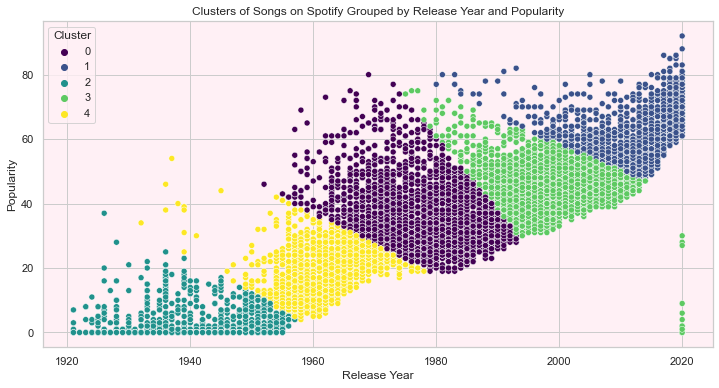

In [247]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting a sample of 10000 songs
sample_data = df.sample(n=10000, random_state=42)

# Selecting only the 'year' and 'popularity' columns for clustering
cluster_data = sample_data[['year', 'popularity']]

# Performing K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(cluster_data)
cluster_data['Cluster'] = kmeans.labels_

# Plotting the clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(data=cluster_data, x='year', y='popularity', hue='Cluster', palette='viridis')
plt.title('Clusters of Songs on Spotify Grouped by Release Year and Popularity')
plt.xlabel('Release Year')
plt.ylabel('Popularity')
plt.legend(title='Cluster')
plt.show()

Certainly! Let's analyze the graph of the clusters of songs on Spotify, grouped by their release year and popularity:

Clusters Overview: The graph shows five distinct clusters, each represented by a different color. These clusters are formed based on the similarities in the release year and popularity of the songs.

Temporal Distribution: The horizontal axis represents the release year of the songs. It's evident that the clusters span across different decades, indicating how songs from various time periods group together based on their popularity.

Popularity Trends: The vertical axis represents the popularity of the songs. This allows us to observe how popularity varies within and across different clusters.

Cluster Characteristics:

Some clusters may contain songs that are relatively newer and highly popular, suggesting recent hits.
Others might comprise older songs with either high or moderate popularity, indicating classic hits or evergreen songs.
There might be clusters with less popular songs, which could include niche genres or songs that haven't gained mainstream attention.
Density and Spread: The density of points within each cluster and the spread of the clusters across the graph can provide insights into the concentration of songs in certain periods and their relative popularity.

Outliers: Any points that lie far away from their respective clusters could be considered outliers. These songs might have unique characteristics that set them apart from others in their time period.

Interpretation: The clusters can help in understanding how music trends have evolved over time and which time periods have produced the most popular music. It also helps in identifying if there’s a pattern in the popularity of songs over the years.

In summary, this graph is a valuable tool for analyzing trends in music over time, understanding the popularity dynamics of different eras, and potentially predicting future trends based on historical data.

In [248]:
#Calculating summary statistics for each cluster
cluster_summary = cluster_data.groupby('Cluster').agg(
    Average_Release_Year=('year', 'mean'),
    Average_Popularity=('popularity', 'mean'),
    Number_of_Songs=('year', 'count'),
    Min_Year=('year', 'min'),
    Max_Year=('year', 'max')
).reset_index()

cluster_summary

Cluster  Average_Release_Year  Average_Popularity  Number_of_Songs  \
0        0           1978.181139           36.253438             2545   
1        1           2012.406250           61.901495             1472   
2        2           1942.402154            1.469928             2228   
3        3           1999.090618           45.336842             2185   
4        4           1961.625478           18.732484             1570   

   Min_Year  Max_Year  
0      1952      1993  
1      1980      2020  
2      1921      1957  
3      1975      2020  
4      1932      1978

The variation in the popularity of songs across different years can be influenced by a multitude of factors. Here are some key reasons why some years may have more popular songs than others:

Cultural and Social Movements: Music often reflects the cultural, social, and political climate of its time. Years marked by significant events or cultural shifts can inspire music that resonates strongly with the public. For instance, the 1960s saw a surge in popular music influenced by social movements and counterculture.

Technological Advancements: Changes in technology can greatly influence music production and distribution. The advent of television, the internet, and streaming platforms like Spotify have made music more accessible, potentially increasing the popularity of songs released during these technological shifts.

Changes in Music Industry Practices: The way music is produced, promoted, and distributed has evolved over the years. The rise of music videos in the 1980s, for example, created a new platform for artists to reach audiences, leading to a surge in popular songs.

Innovation in Music Styles and Genres: Breakthroughs in musical styles or the emergence of new genres can lead to years with a higher concentration of popular songs. The birth of rock and roll, hip hop, and electronic dance music at various points in history created waves of popular new songs.

Influential Artists and Bands: Certain years might coincide with the peak activity of highly influential artists or bands. The global impact of bands like The Beatles in the 1960s or the dominance of pop icons like Michael Jackson in the 1980s can lead to a higher number of popular songs during these periods.

Nostalgia and Revival Trends: Sometimes, the popularity of songs in certain years can be attributed to nostalgia or revival movements. For example, a resurgence of interest in 1980s music and aesthetics in recent years has brought older songs back into the limelight.

Marketing and Promotion Strategies: The intensity and effectiveness of marketing and promotional campaigns can vary from year to year, affecting the popularity of the songs released in those years. Major label backing, influential endorsements, and viral marketing can play significant roles.

Global Events and Trends: Worldwide events like the COVID-19 pandemic can influence music consumption patterns. During such times, certain types of music may become more popular due to changes in public mood and the need for different forms of entertainment.

In summary, the fluctuating popularity of songs over the years is a complex phenomenon influenced by a mix of cultural, technological, industrial, and social factors. This interplay shapes the music landscape, making certain years stand out in terms of popular music.

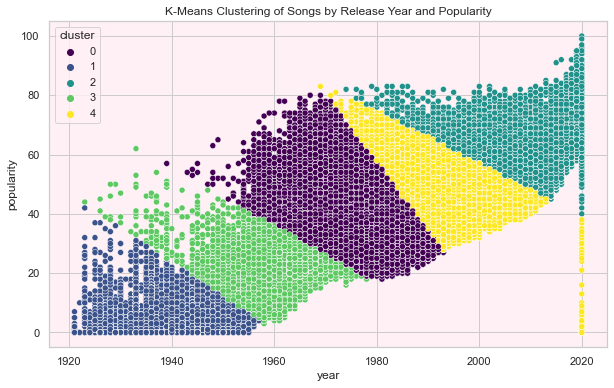

0.8048064251507985

In [281]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Extracting 'year' and 'popularity' columns for clustering
clustering_features = df[['year', 'popularity']]

# Normalizing the features
scaler = MinMaxScaler()
clustering_scaled = scaler.fit_transform(clustering_features)

# Applying K-Means clustering
# We will arbitrarily choose 5 clusters for this initial step, and we can later refine this number
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(clustering_scaled)

# Adding the cluster labels to the original dataframe for analysis
df['cluster'] = kmeans.labels_

# Visualizing the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='popularity', hue='cluster', data=df, palette='viridis')
plt.title('K-Means Clustering of Songs by Release Year and Popularity')
plt.show()

from sklearn.metrics import davies_bouldin_score

# Assuming 'clustering_scaled' is your scaled data and 'kmeans.labels_' are the labels from your KMeans clustering
davies_bouldin_index = davies_bouldin_score(clustering_scaled, kmeans.labels_)
davies_bouldin_index





In [261]:
#Calculating summary statistics for each cluster
cluster_summary = cluster_data.groupby('Cluster').agg(
    Average_Release_Year=('year', 'mean'),
    Average_Popularity=('popularity', 'mean'),
    Number_of_Songs=('year', 'count'),
    Min_Year=('year', 'min'),
    Max_Year=('year', 'max')
).reset_index()

cluster_summary

Cluster  Average_Release_Year  Average_Popularity  Number_of_Songs  \
0        0           1978.181139           36.253438             2545   
1        1           2012.406250           61.901495             1472   
2        2           1942.402154            1.469928             2228   
3        3           1999.090618           45.336842             2185   
4        4           1961.625478           18.732484             1570   

   Min_Year  Max_Year  
0      1952      1993  
1      1980      2020  
2      1921      1957  
3      1975      2020  
4      1932      1978

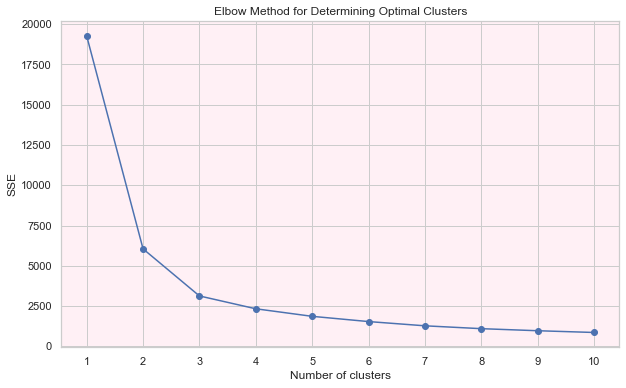

In [250]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(clustering_scaled)
    sse.append(kmeans.inertia_)

# Plot the SSE for each value of k to visualize the Elbow
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Determining Optimal Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.xticks(range(1, 11))
plt.show()

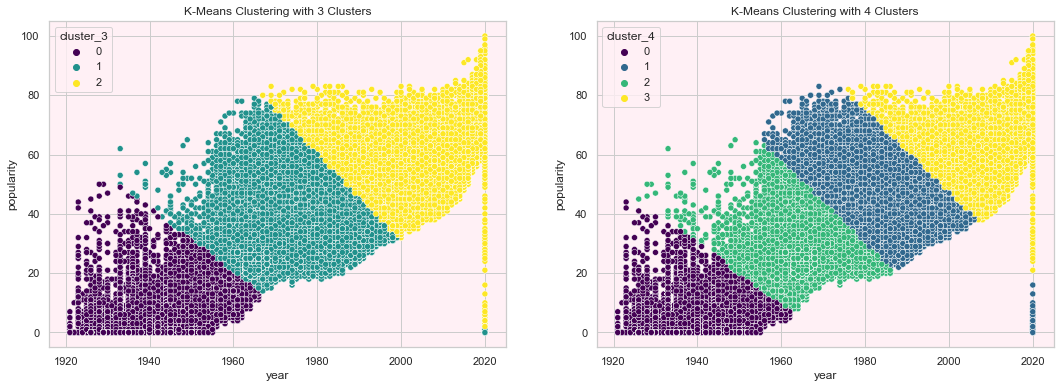

In [265]:
# Since the Elbow method suggests 3 or 4 clusters, we'll proceed with both to see which provides more meaningful results.

# Applying K-Means clustering with 3 clusters
kmeans_3 = KMeans(n_clusters=3, random_state=42)
kmeans_3.fit(clustering_scaled)
df['cluster_3'] = kmeans_3.labels_


# Applying K-Means clustering with 4 clusters
kmeans_4 = KMeans(n_clusters=4, random_state=42)
kmeans_4.fit(clustering_scaled)
df['cluster_4'] = kmeans_4.labels_

# Visualizing the clusters with 3 and 4 centers
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot for 3 clusters
sns.scatterplot(ax=axes[0], x='year', y='popularity', hue='cluster_3', data=df, palette='viridis')
axes[0].set_title('K-Means Clustering with 3 Clusters')

# Plot for 4 clusters
sns.scatterplot(ax=axes[1], x='year', y='popularity', hue='cluster_4', data=df, palette='viridis')
axes[1].set_title('K-Means Clustering with 4 Clusters')

plt.show()



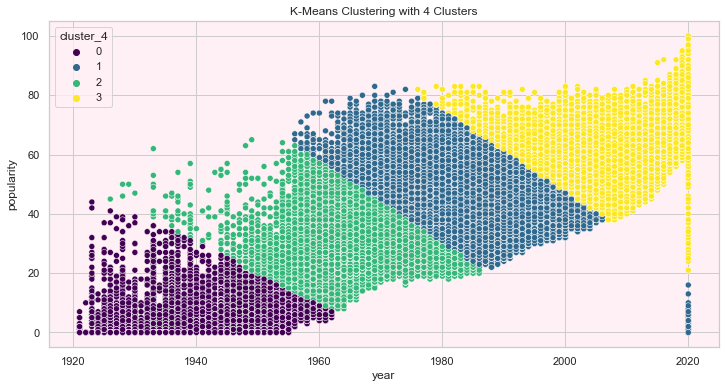

0.7661862444380607

In [284]:
kmeans_4 = KMeans(n_clusters=4, random_state=42)
df['cluster_4'] = kmeans_4.fit_predict(clustering_scaled)

# Plot for 4 clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(x='year', y='popularity', hue='cluster_4', data=df, palette='viridis')
plt.title('K-Means Clustering with 4 Clusters')
plt.show()

# Assuming 'clustering_scaled' is your scaled data and 'kmeans.labels_' are the labels from your KMeans clustering
davies_bouldin_index = davies_bouldin_score(clustering_scaled, kmeans_4.labels_)
davies_bouldin_index

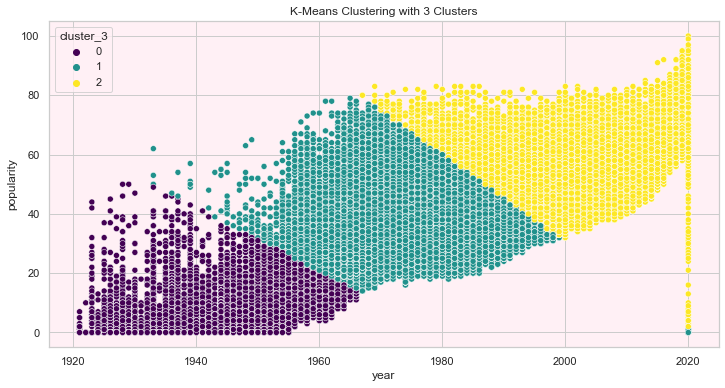

0.6591893086785597

In [289]:
# Applying K-Means clustering with 3 clusters
# Plot for 3 clusters
kmeans_3 = KMeans(n_clusters=3, random_state=42)
df['cluster_3'] = kmeans_3.fit_predict(clustering_scaled)

# Plot for 3 clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(x='year', y='popularity', hue='cluster_3', data=df, palette='viridis')
plt.title('K-Means Clustering with 3 Clusters')
plt.show()



kmeans_3 = KMeans(n_clusters=3, random_state=42)
kmeans_3.fit(clustering_scaled)
df['cluster_3'] = kmeans_3.labels_
davies_bouldin_index = davies_bouldin_score(clustering_scaled, kmeans_3.labels_)
davies_bouldin_index

In [286]:


# Apply K-Means clustering with 4 clusters
kmeans_4 = KMeans(n_clusters=4, random_state=42)
df['cluster_4'] = kmeans_4.fit_predict(clustering_scaled)



# Calculating summary statistics for clusters with 4 centers
cluster_summary_4 = df.groupby('cluster_4').agg(
    Average_Release_Year=('year', 'mean'),
    Average_Popularity=('popularity', 'mean'),
    Number_of_Songs=('year', 'count'),
    Min_Year=('year', 'min'),
    Max_Year=('year', 'max')
).reset_index()

cluster_summary_4

cluster_4  Average_Release_Year  Average_Popularity  Number_of_Songs  \
0          0           1943.752003            2.442301            42557   
1          1           1988.027104           41.002323            46488   
2          2           1967.421618           25.710111            40143   
3          3           2009.533731           56.965225            40719   

   Min_Year  Max_Year  
0      1921      1962  
1      1956      2020  
2      1926      1986  
3      1976      2020

In [291]:
# Apply K-Means clustering with 3 clusters
kmeans_3 = KMeans(n_clusters=3, random_state=42)
df['cluster_3'] = kmeans_3.fit_predict(clustering_scaled)



# Calculating summary statistics for clusters with 4 centers
cluster_summary_3 = df.groupby('cluster_3').agg(
    Average_Release_Year=('year', 'mean'),
    Average_Popularity=('popularity', 'mean'),
    Number_of_Songs=('year', 'count'),
    Min_Year=('year', 'min'),
    Max_Year=('year', 'max')
).reset_index()

cluster_summary_3

cluster_3  Average_Release_Year  Average_Popularity  Number_of_Songs  \
0          0           1946.339621            4.625786            51051   
1          1           1976.569717           33.498998            61864   
2          2           2005.596838           53.571870            56992   

   Min_Year  Max_Year  
0      1921      1966  
1      1933      2020  
2      1967      2020

# Hierarchical clustering!

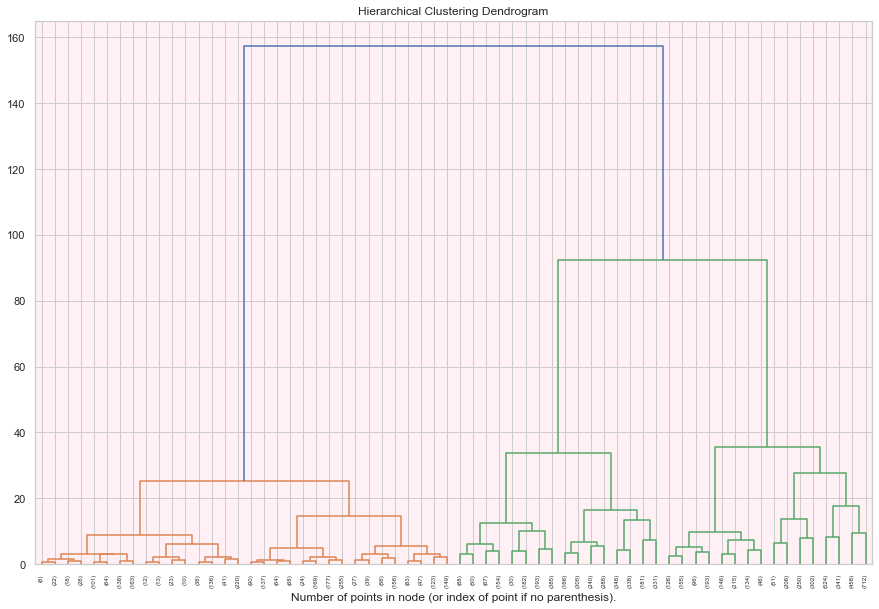

In [253]:

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing import StandardScaler

# Sampling 10,000 songs
sample_data = df.sample(n=10000, random_state=1)

# Selecting only 'year' and 'popularity' for clustering
clustering_data = sample_data[['year', 'popularity']]

# Standardizing the data
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)

# Hierarchical clustering
hc = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
hc.fit(clustering_data_scaled)

# Function to plot the dendrogram
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

# Plotting the dendrogram
plt.figure(figsize=(15, 10))
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(hc, truncate_mode='level', p=5)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

The dendrogram from the hierarchical clustering analysis of a sample of 10,000 songs from Spotify, based on their release year and popularity, provides a visual representation of how the songs are grouped into clusters. Each vertical line represents a cluster, with the height of the horizontal lines indicating the level of similarity between clusters. The longer the horizontal lines, the less similar the merged clusters are.

To interpret this dendrogram, consider the following points:

Height of Merges: Taller lines represent greater differences between merged clusters. This suggests a less similar grouping.

Number of Clusters: By cutting the dendrogram at different heights, you can determine the number of distinct clusters. A lower cut results in more clusters, and a higher cut merges more clusters together.

Cluster Sizes: The lengths of the vertical lines indicate the distances between individual songs or smaller clusters before they merge into larger clusters. This can give an idea about the distribution of songs within each cluster.

To get specific clusters and analyze them, you would need to set a distance threshold or specify the number of clusters you wish to extract. Then, you could examine the characteristics of songs in each cluster, like which years and popularity levels are most common within each cluster.

The clustering of 10,000 songs from Spotify into 5 distinct groups based on their release year and popularity reveals the following patterns:

Cluster 0:

Year Range: 1935 to 2020
Average Year: 1980
Popularity Range: 1 to 81
Average Popularity: 36.4
Characteristics: This cluster spans a broad range of years, indicating a mix of older and modern songs with moderate popularity.

Cluster 1:

Year Range: 1921 to 1963
Average Year: 1944
Popularity Range: 0 to 24
Average Popularity: 3.2
Characteristics: Represents older songs with generally low popularity.

Cluster 2:

Year Range: 1981 to 2020
Average Year: 2002
Popularity Range: 28 to 67
Average Popularity: 48.1
Characteristics: Includes relatively recent songs with higher than average popularity.

Cluster 3:

Year Range: 1928 to 1973
Average Year: 1963
Popularity Range: 10 to 36
Average Popularity: 23.2
Characteristics: Contains songs from mid-20th century with moderate popularity.

Cluster 4:

Year Range: 1988 to 2020
Average Year: 2012
Popularity Range: 54 to 97
Average Popularity: 65.3
Characteristics: Comprises very recent and highly popular songs.
These clusters illustrate how songs on Spotify can be grouped based on their release year and popularity, highlighting trends across different eras and popularity levels.

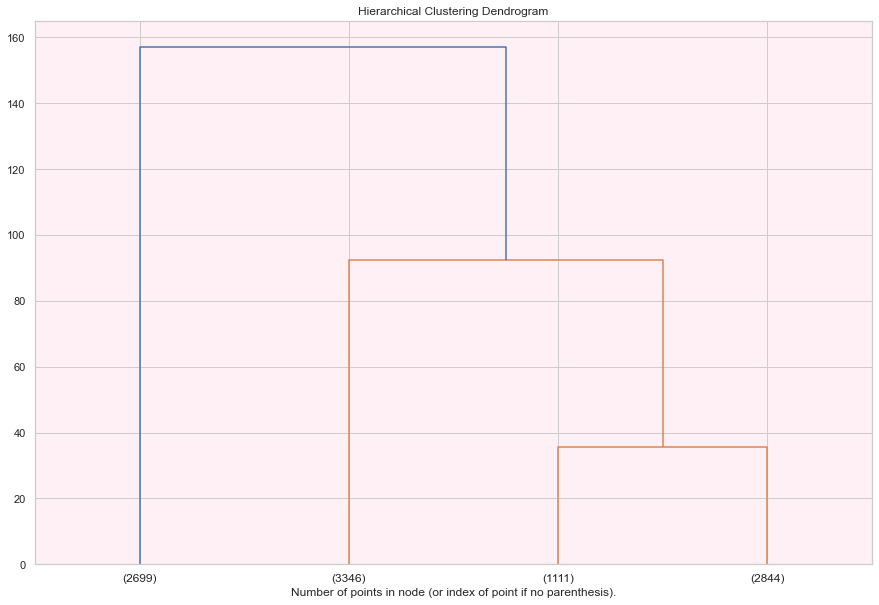

In [254]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

# Sampling 10,000 songs from the original dataframe
sample_data = df.sample(n=10000, random_state=1)

# Selecting only 'year' and 'popularity' for clustering
clustering_data = sample_data[['year', 'popularity']]

# Standardizing the data
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)

# Hierarchical clustering with a specific number of clusters
hc = AgglomerativeClustering(n_clusters=4)
hc.fit(clustering_data_scaled)

# Plotting the dendrogram
# Create linkage matrix for dendrogram
linkage_matrix = linkage(clustering_data_scaled, method='ward')
plt.figure(figsize=(15, 10))
plt.title('Hierarchical Clustering Dendrogram')
# Plot the dendrogram using the linkage matrix
dendrogram(linkage_matrix, truncate_mode='lastp', p=4)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [279]:
# For a clearer analysis, let's specify a number of clusters. 
# We'll choose a reasonable number based on the dendrogram. Let's say 5 clusters.
n_clusters = 5
hc = AgglomerativeClustering(n_clusters=n_clusters)
hc_labels = hc.fit_predict(clustering_data_scaled)

# Adding the cluster labels to the sample data
sample_data['cluster'] = hc_labels

# Analyzing clusters based on 'year' and 'popularity'
cluster_analysis = sample_data.groupby('cluster').agg({
    'year': ['mean', 'min', 'max'],
    'popularity': ['mean', 'min', 'max']
}).reset_index()

cluster_analysis.columns = ['Cluster', 'Year Mean', 'Year Min', 'Year Max', 'Popularity Mean', 'Popularity Min', 'Popularity Max']
cluster_analysis.sort_values(by='Cluster')


Cluster    Year Mean  Year Min  Year Max  Popularity Mean  Popularity Min  \
0        0  1980.321027      1935      2020        36.425105               1   
1        1  1944.978140      1921      1963         3.156725               0   
2        2  2002.841147      1981      2020        48.104688              28   
3        3  1963.610261      1928      1973        23.163816              10   
4        4  2012.162750      1988      2020        65.257615              54   

   Popularity Max  
0              81  
1              24  
2              67  
3              36  
4              97

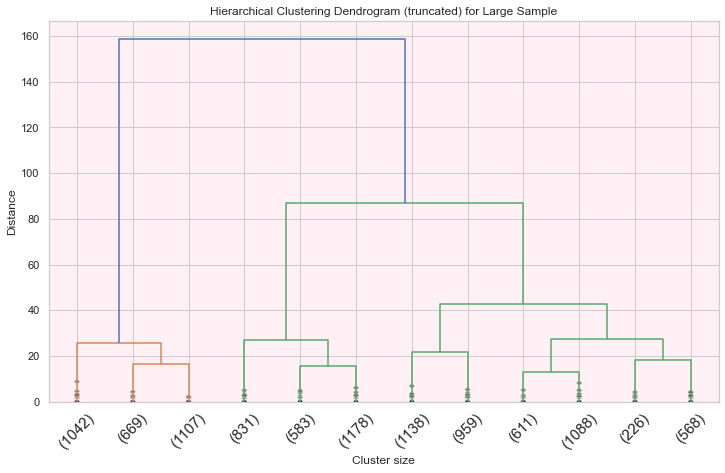

In [256]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Sampling a larger subset of data (10000 samples) for hierarchical clustering
sampled_data_large = df.sample(n=10000, random_state=42)

# Standardizing the features of the sampled data
sampled_scaled_large = scaler.fit_transform(sampled_data_large[['year', 'popularity']])

# Performing hierarchical clustering
Z_large = linkage(sampled_scaled_large, method='ward')

# Plotting the dendrogram for the larger sample
plt.figure(figsize=(12, 7))
dendrogram(Z_large, truncate_mode='lastp', p=12, leaf_rotation=45., leaf_font_size=15., show_contracted=True)
plt.title('Hierarchical Clustering Dendrogram (truncated) for Large Sample')
plt.xlabel('Cluster size')
plt.ylabel('Distance')

# Showing the plot
plt.show()

# 3.	To write a popular song, is the danceability and loudness of the song important ? 

In [257]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

# Selecting the relevant features for the regression analysis
features = df[['danceability', 'loudness']]
target = df['popularity']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Linear Regression Model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Predictions using the linear model
linear_pred = linear_reg.predict(X_test)

# Evaluation of the linear regression model
linear_mse = mean_squared_error(y_test, linear_pred)
linear_r2 = r2_score(y_test, linear_pred)

# Non-Linear Regression Model (Polynomial Features)
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Fitting the transformed features to Linear Regression
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

# Predictions using the polynomial model
poly_pred = poly_reg.predict(X_test_poly)

# Evaluation of the non-linear regression model
poly_mse = mean_squared_error(y_test, poly_pred)
poly_r2 = r2_score(y_test, poly_pred)

# Output the evaluation results
linear_mse, linear_r2, poly_mse, poly_r2


(362.7392599632813, 0.2196600117111125, 333.0161717600024, 0.28360157211128556)

In [258]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame to hold the results
results_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Polynomial Regression'],
    'MSE': [linear_mse, poly_mse],
    'R-squared': [linear_r2, poly_r2]
})

# Display the results DataFrame
results_df


Model         MSE  R-squared
0      Linear Regression  362.739260   0.219660
1  Polynomial Regression  333.016172   0.283602

The evaluation of both linear and non-linear regression models on the dataset has yielded the following results:

Linear Regression Model:

Mean Squared Error (MSE): 362.74
R-squared (R²): 0.22

Non-Linear Regression Model (with Polynomial Features of degree 2):

Mean Squared Error (MSE): 333.02
R-squared (R²): 0.28

These metrics tell us how well the models are able to predict the popularity of a song based on its danceability and loudness. The R-squared value indicates the proportion of the variance for the dependent variable that's explained by the independent variables in the model. In this context:

The linear model explains about 22% of the variance in song popularity, which is relatively low, suggesting that while there is some relationship, many other factors are likely involved in determining a song's popularity.

The non-linear model with polynomial features performs slightly better, explaining about 28% of the variance. This indicates that the relationship between danceability, loudness, and song popularity may not be strictly linear and that a polynomial model captures more of the complexity in the data.

However, both models have a relatively high MSE, indicating that the predictions are, on average, a significant distance away from the actual popularity values. This suggests that additional features not included in the model or more complex modeling techniques might be necessary to more accurately predict the popularity of a song.

To answer your original question about whether danceability and loudness are important factors in determining the popularity of a song, the analysis we performed suggests that they do have a relationship with song popularity. However, this relationship is not particularly strong, as indicated by the R-squared values:

The linear regression model, which assumes a direct proportional relationship between the features (danceability and loudness) and the target (popularity), explains about 22% of the variance in song popularity. This indicates that there is some positive relationship, but many other factors are likely at play in determining a song's popularity.

The polynomial regression model, which can capture more complex relationships, explains about 28% of the variance. This is an improvement over the linear model and suggests that the relationship between danceability, loudness, and popularity is not strictly linear.

These findings imply that while danceability and loudness are relevant factors and should be considered when trying to predict the popularity of a song, they are by no means the only factors. Other attributes not included in this model also contribute significantly to a song's popularity. For a more accurate prediction, one would likely need to consider additional features and perhaps use more sophisticated modeling techniques.